## Importing Libraries


In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
#Environment settings

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)
pd.set_option('display.width',None)

## Reading DATA SET

In [3]:
# Reading the dataset
df_leads = pd.read_csv("Leads.csv")

In [4]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
df_leads.shape

(9240, 37)

## Data Understandings

In [6]:
df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

We can see from above that we have many NULL values in the dataset

In [9]:
#Checking for count of missing values in each column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Check for duplicate rows
df_leads.duplicated().sum()

0

THere are no duplicate rows in Dataset

## Data Cleaning 

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.
******
One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select

In [11]:
# List of columns having 'Select' as value

select_columns = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
select_columns

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [12]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [13]:
# Checking if all 'Select' values have been handled in the columns
[col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]

[]

###### Handling Missing Data

In [14]:
# Calculating Missing Values Percentage
100*(df_leads.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

As we can see few columns have more than 50% NUll data, These are not useful and we can not remove those rows as well, which will result in significant data loss (more than half of data)
***********
So we will check if columns have 40% null values then will remove them

In [15]:
# user defined function to drop columns and know the shape before and after dropping

def dropNullColumns(data ,percentage):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)
    
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    
    print("Shape after dropping columns: ",data.shape)

In [16]:
# dropping columns
dropNullColumns(df_leads,40) 

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [17]:
# Checking the percentage of null values for remaining columns

100*(df_leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### Categorical Columnsm

In [18]:
# Select the columns with Object/Category data type
cat_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
cat_cols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

Let us check value counts for features above 

In [19]:
df_leads["City"].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

City has 39.71 % missing values. Imputing missing values with Mumbai (as this occurs highest) will make the data more skewed. Skewness will later cause bias in the model. Hence City column can be dropped.

In [20]:
df_leads["Specialization"].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

 Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called 'Others`

In [21]:
df_leads["Tags"].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence it can be dropped.

In [22]:
df_leads["What matters most to you in choosing a course"].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

It  has 29.32 % missing values and also 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight.

In [23]:
df_leads["What is your current occupation"].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.

In [24]:
df_leads["Country"].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

X Education sells online courses and appx 96% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence `Country column can be dropped.

In [25]:
df_leads["Last Activity"].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

"Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.

In [26]:
df_leads["Lead Source"].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

"Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

###### Dropping few cols based on prev analysis
-----
Cols to be dropped 
* 'City',
* 'Tags',
* 'Country',
* 'What matters most to you in choosing a course'

In [27]:
# Dropping Columns
print("Before Drop",df_leads.shape)
df_leads.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",df_leads.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


###### Imputing the following columns
------
* 'Specialization',
* 'Lead Source',
* 'Last Activity',
* 'What is your current occupation

In [28]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [29]:
# Checking the percentage of null values for remaining columns
round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

#### Numerical Columns

In [30]:
df_leads["TotalVisits"].value_counts(dropna=False)

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

Let's impute Missing values in 'TotalVisits' with mode.

In [31]:
# TotalVisits missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [32]:
df_leads.TotalVisits.value_counts(dropna=False)

TotalVisits
0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [33]:
df_leads["Page Views Per Visit"].value_counts(dropna=False)

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: count, Length: 115, dtype: int64

Let's impute Missing values in 'Page Views Per Visit' with mode.

In [34]:
# Page Views Per Visit missing values to be imputed with mode

df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

In [35]:
# Checking the percentage of null values after handling categorical and numerical columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

###### Dropping columsn which are not necessery for analysis

In [36]:
df_leads['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

###### Handling columns with only one unique value


In [37]:
#check for columns with one unique value, count and freq is same

df_leads.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine Newspaper Article  \
count                             9240   9240     9240              9240   
unique                               6      2        1                 2   
top                         Unemployed     No       No                No   
freq                              8290   9226     9240              9238   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407

##### Following columns have only one unique value:
------
* 'I agree to pay the amount through cheque',
* 'Get updates on DM Content',
* 'Update me on Supply Chain Content',
* 'Receive More Updates About Our Courses',
* 'Magazine'
* These columns are of no use as they have only one category of response from customer and can be dropped:

In [38]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df_leads.shape)
df_leads.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


We can drop few cols such as:
* 'Prospect ID',
* 'Lead Number',
* 'Last Notable Activity'

As these are not having much information towards analysis 

In [39]:
# Dropping Columns
print("Before Dropping Columns",df_leads.shape)
df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


In [40]:
# get the percentage of missing values in each row,output in descending order so high value will come on top

100*(df_leads.isna().mean(axis=1)).sort_values(ascending=False)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
       ... 
3080    0.0
3081    0.0
3082    0.0
3083    0.0
9239    0.0
Length: 9240, dtype: float64

There are no missing values in rows

###### Checking skewness in categorical columns

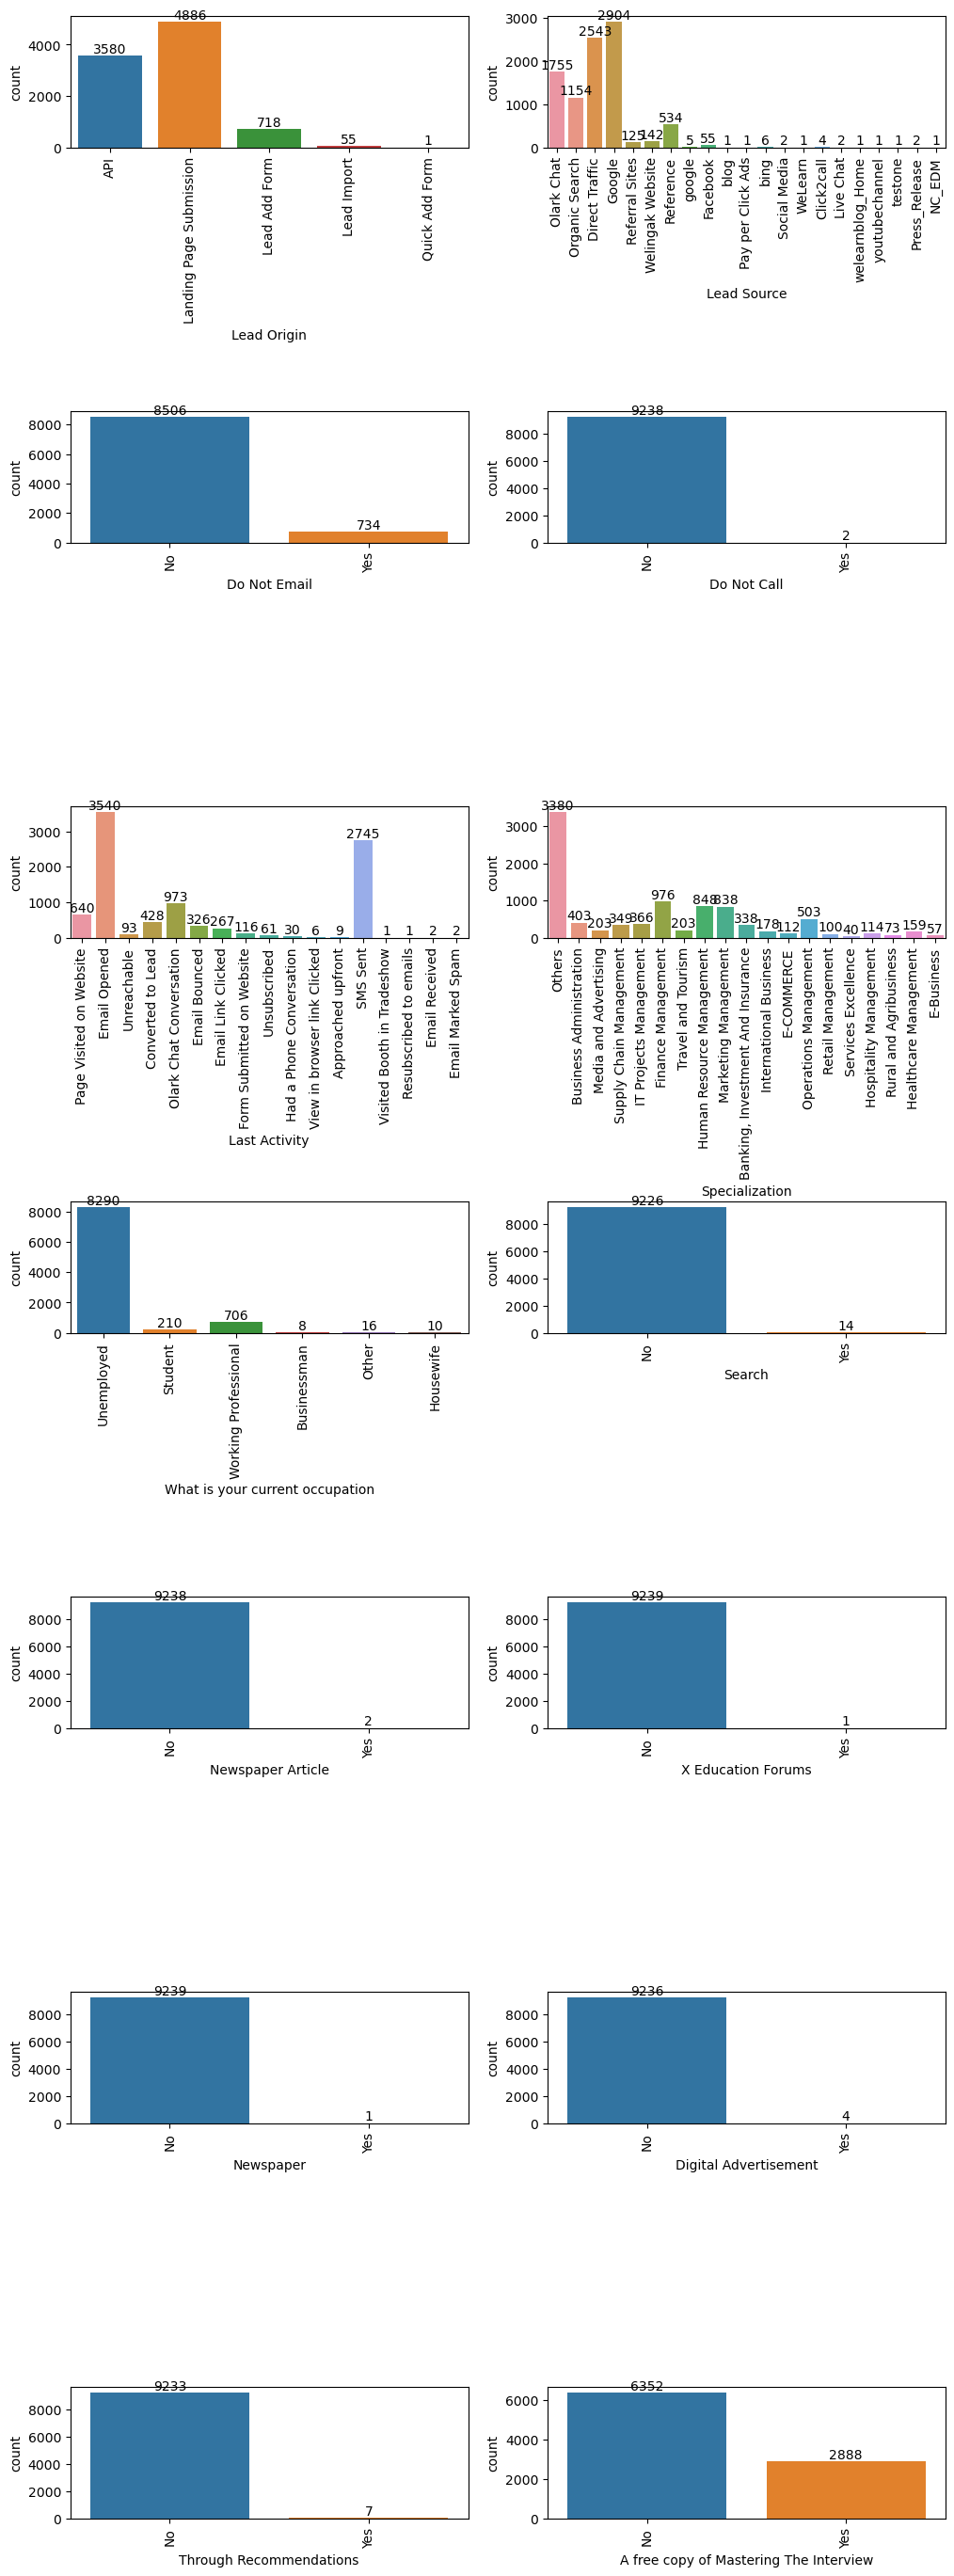

In [41]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

Following columns have data which is highly skewed :
* 'Do Not Call',
* 'Search',
* 'Newspaper Article',
* 'X Education Forums',
* 'Newspaper',
* 'Digital Advertisement',
* 'Through Recommendations'

Hence we can drop these columns, as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can lead to biased or inaccurate parameter estimates.

In [42]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [43]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

Missing values are taken care , now we can check for Ouliers

### Oulier Handling

###### NUmerical columns

In [44]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='Purple')

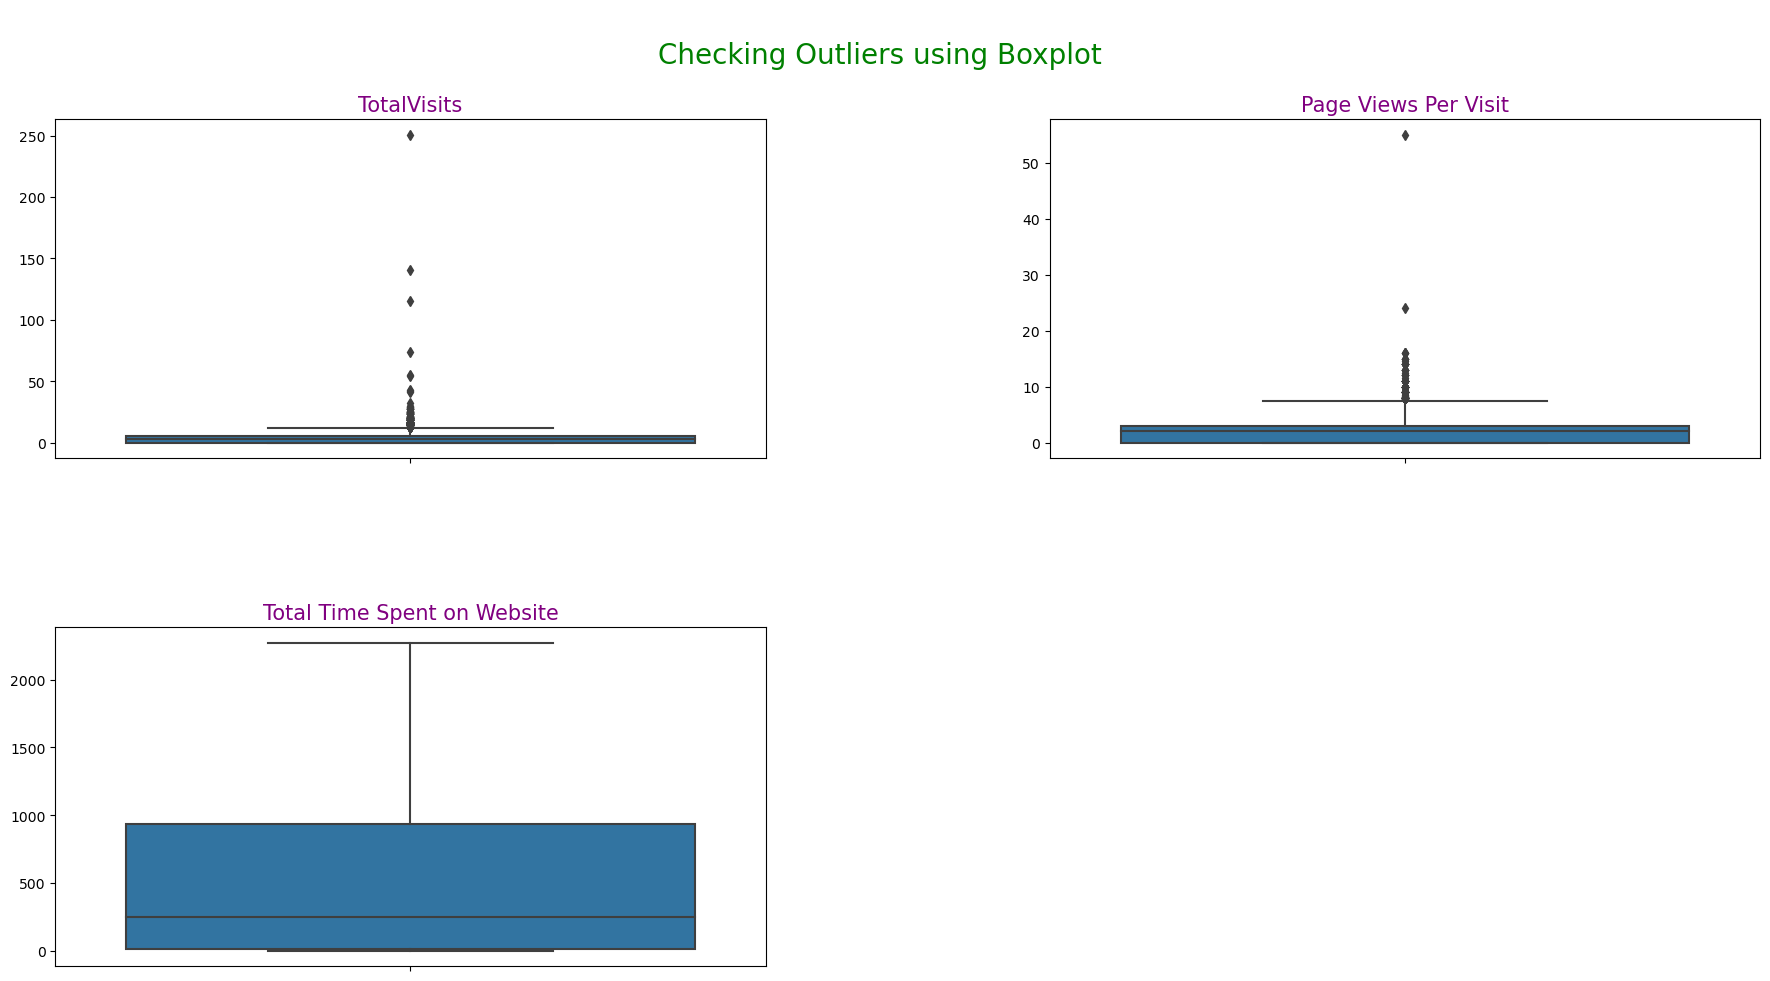

In [45]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

Check_Outliers(df_leads,num_cols)

"TotalVisits","Page Views Per Visit"
Both of these columns contain outliers as can be seen in the boxplot So, These outliers needs to be treated for these variables

In [46]:
# before outlier treatment
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max               55.000000

In [47]:
def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
# Oulier handling function

In [48]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]
Outlier_treatment(df_leads,capping_cols)

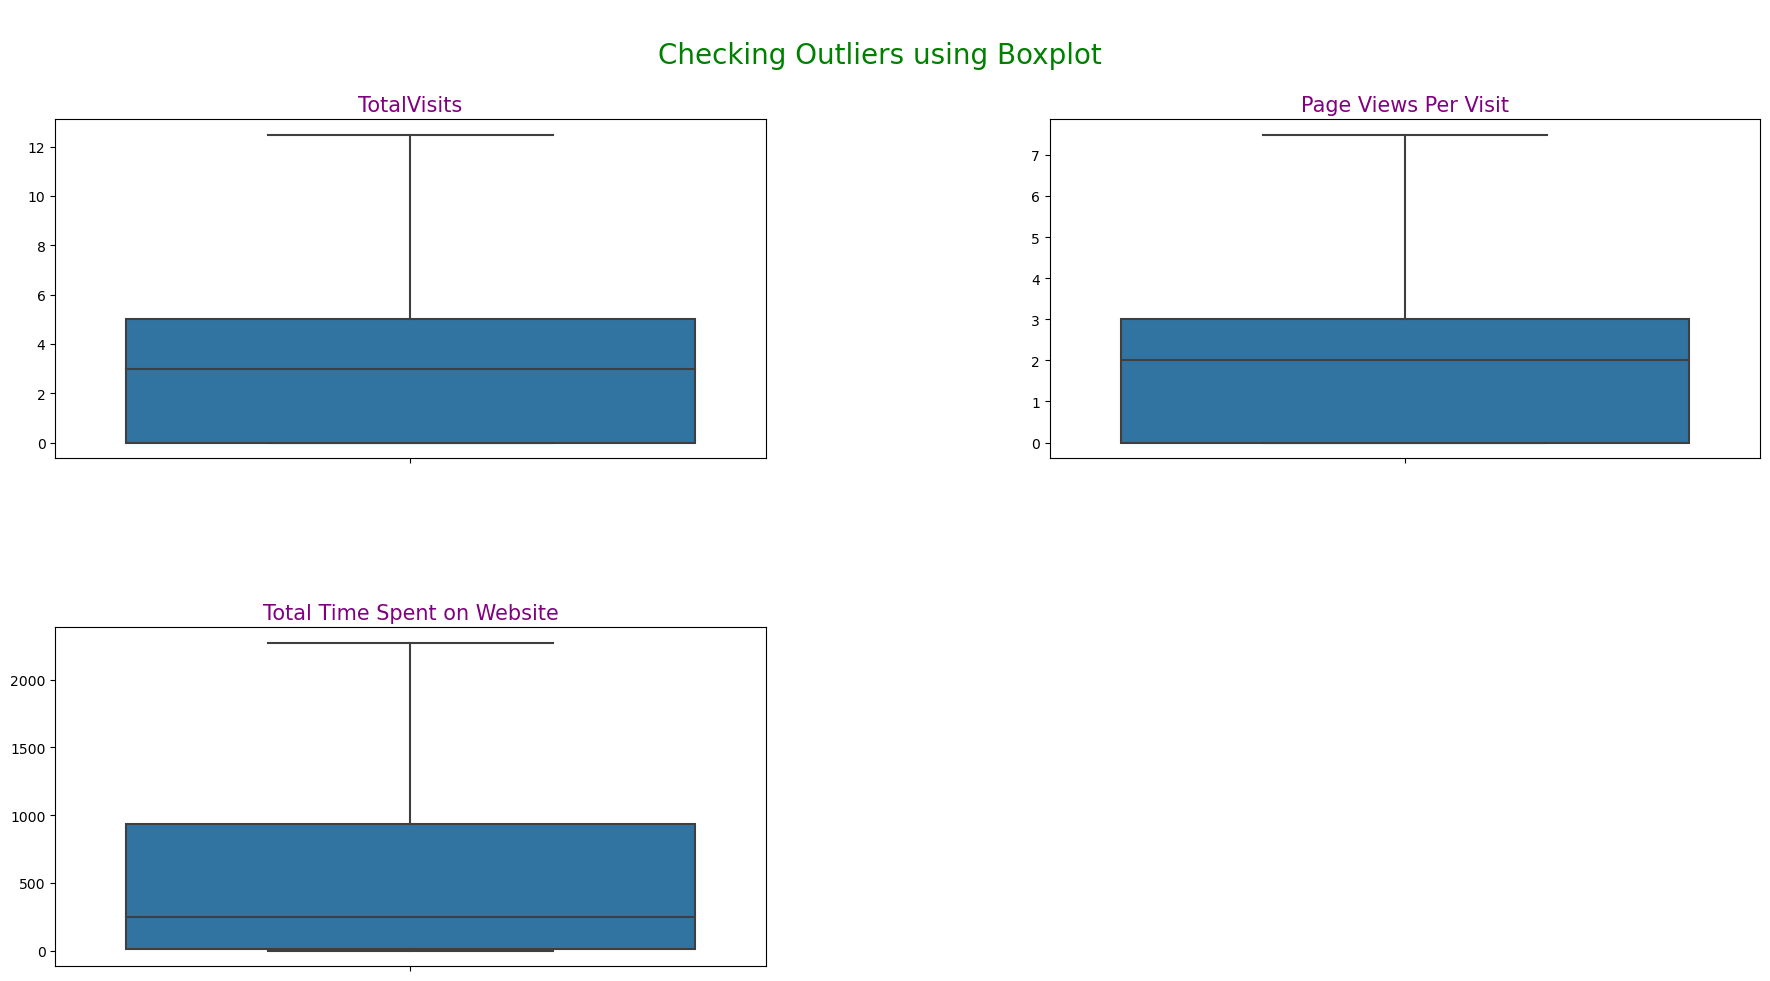

In [49]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df_leads,num_cols)

In [50]:
# after outlier treatment detailed percentile values
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max                7.500000

####  Standardising Data


In [51]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [52]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_^_"*40,"\n")

value_counts % for : Lead Origin 

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_ 

value_counts % for : Lead Source 

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLea

We've noticed that some categories/levels in the "Lead Score" and "Last Activity" columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we're planning to group these categories together under "Others". That way, we can keep things neat and tidy.

Also we can see "Google" & "google" are same in "Lead Source", so we will standardise the case

In [53]:
# Grouping low frequency value levels to Others
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [54]:
# value_counts percentage after replace
df_leads["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

In [55]:
# Grouping low frequency value levels to Others 
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [56]:
# value_counts percentage after replace
df_leads['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

In [57]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

"Do Not Email" & "Free_copy" both are binary categorical columns lets map both of them yes/no to 1/0

In [58]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

--- Checking Data-types of variables


In [59]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


##### Checking if Data is Imbalanced 

----
- Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset.
- Data imbalance is in the context of Target variable only

- Target variable is 'Converted' which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted

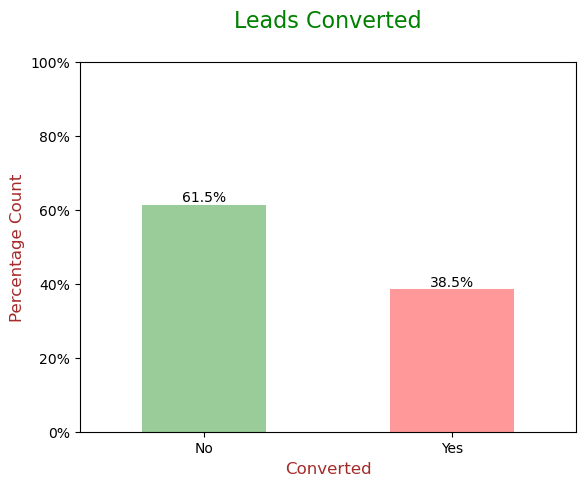

In [60]:
## ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

Conversion rate is of 38.5%, meaning only 38.5% of the people have converted to leads.(Minority).


While 61.5% of the people didnt convert to leads. (Majority)

`

In [61]:
# Ratio of Data Imbalance
ratio=(df_leads["Converted"].value_counts(normalize=True).loc[0])/(df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


#### Univariate Analysis


In [62]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [63]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

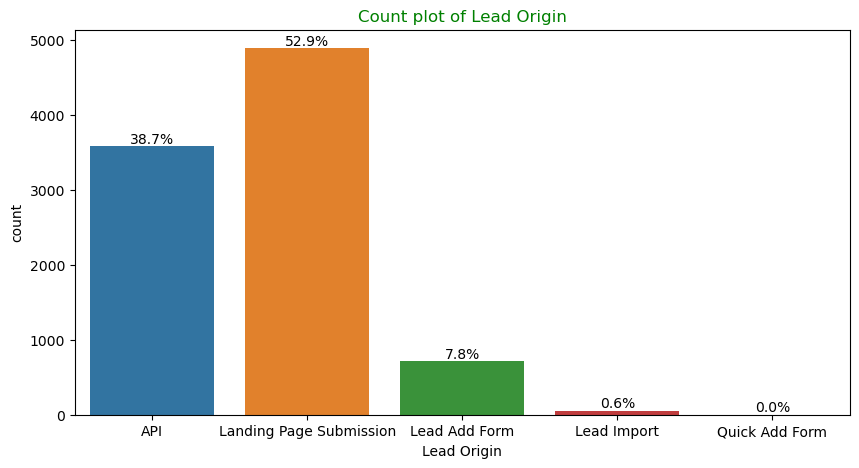

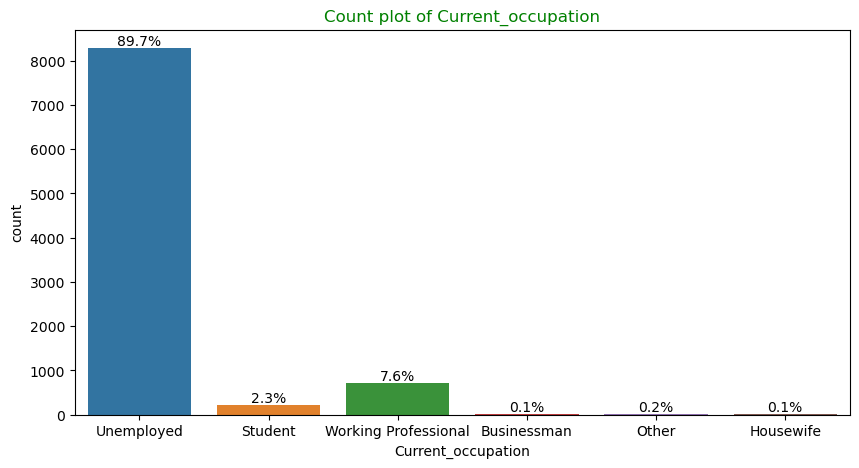

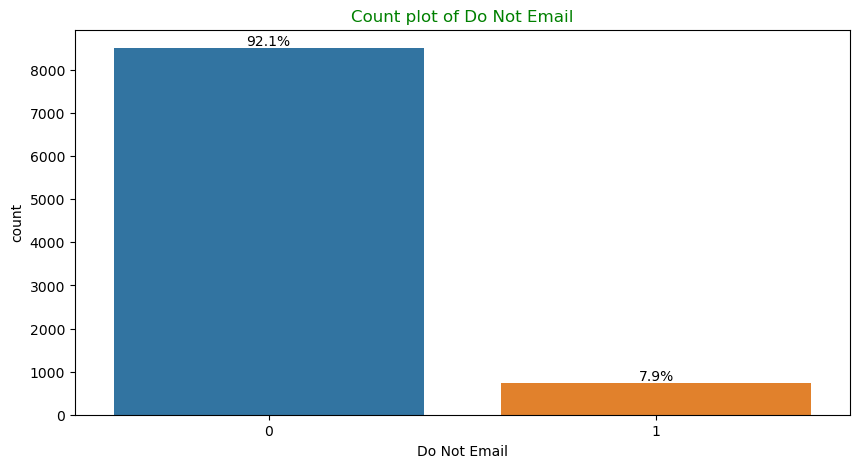

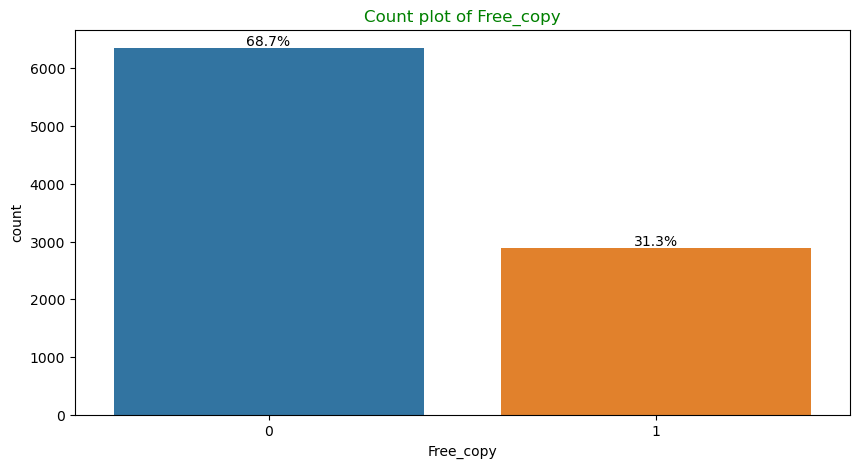

In [64]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

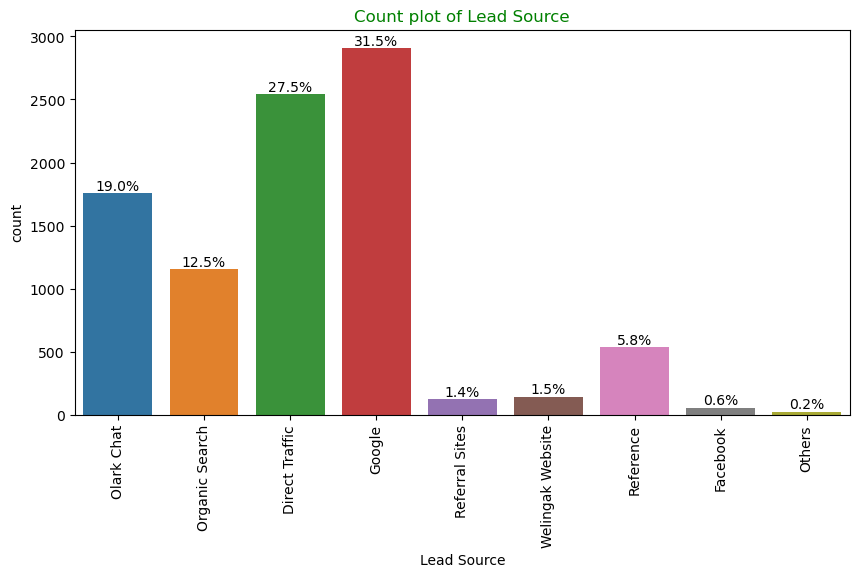

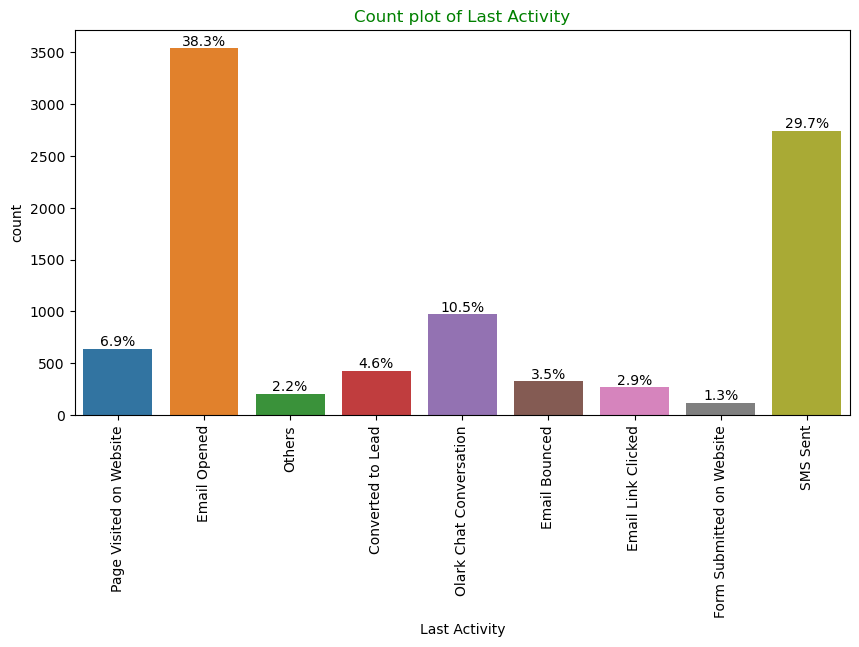

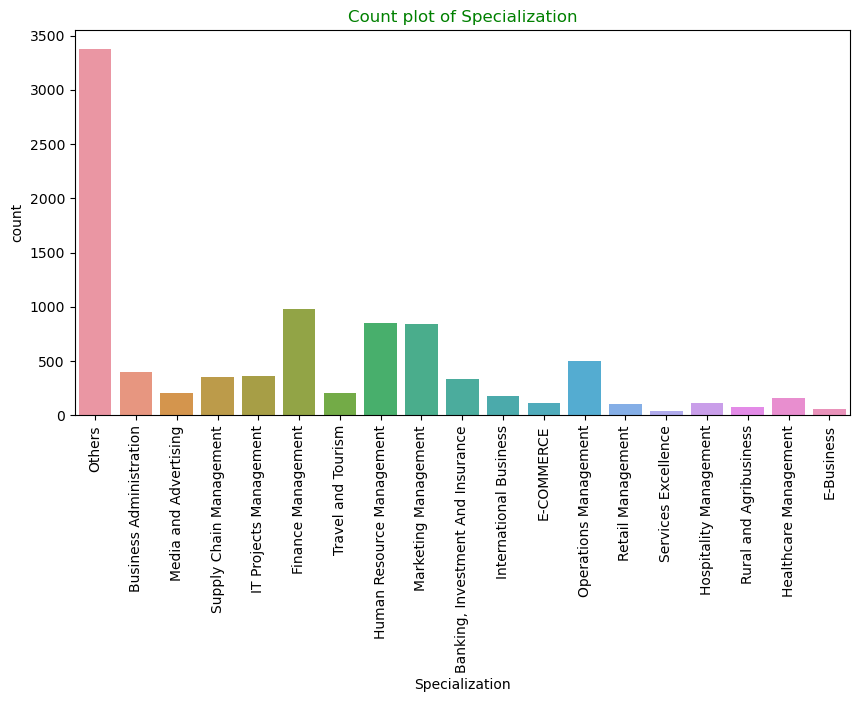

In [65]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

From above we can derive these

- In Categorical Univariate Analysis we get to know the value counts percentage in each variable that how much is the distribution of values in each column.

- With this we get some understanding that which variables can be used in Bivariate analysis.


Here is the list of features from variables which are present in majority 

- Lead Origin: "Landing Page Submission" identified 53% customers, "API" identified 39%.

- Current_occupation: It has 90% of the customers as Unemployed

- Do Not Email: 92% of the people has opted that they dont want to be emailed about the course.

- Lead Source: 58% Lead source is from Google & Direct Traffic combined

- Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities

##### Bivariate Analysis

In [66]:
#"Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)
    
    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

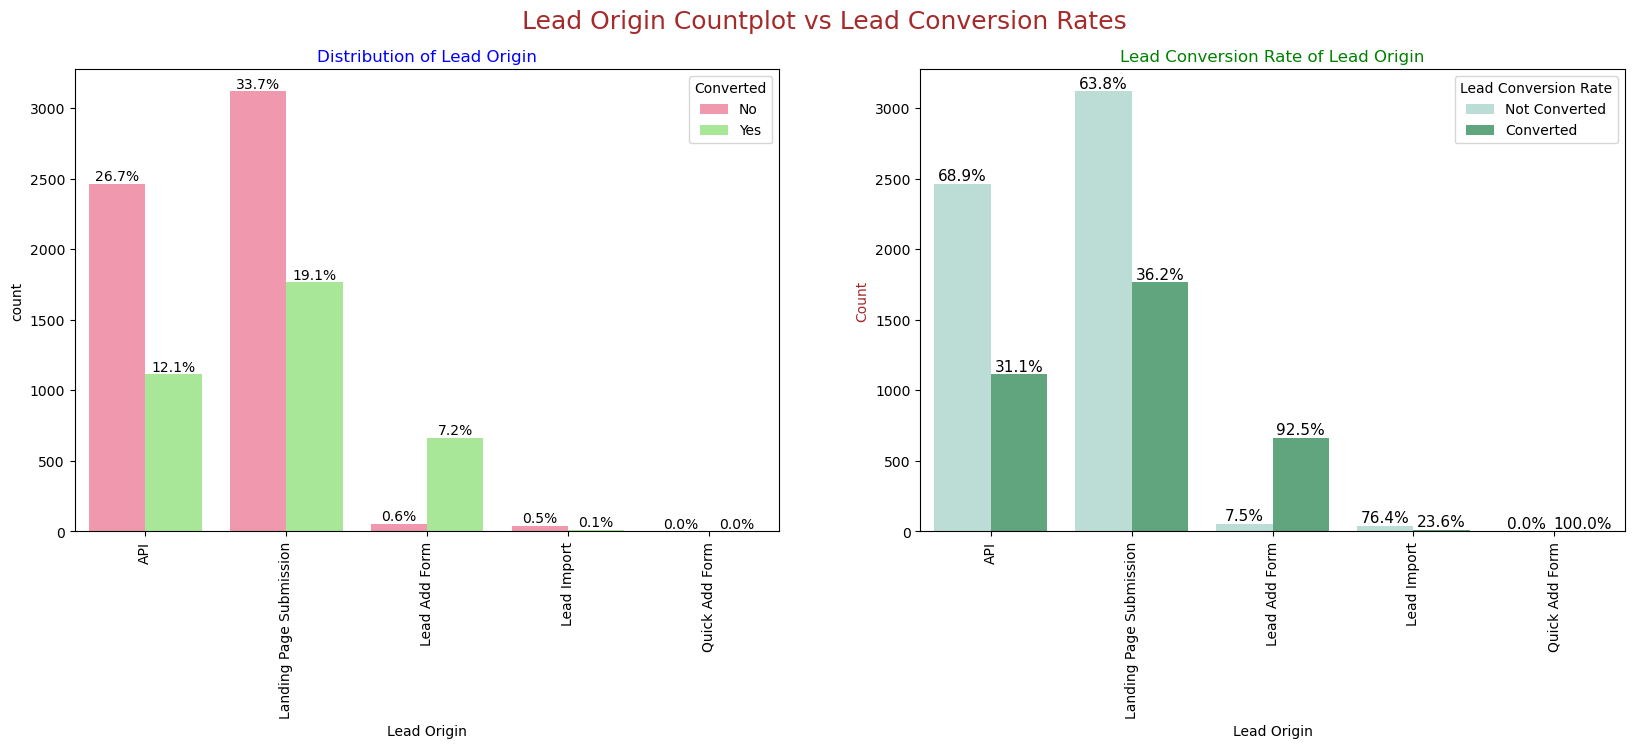

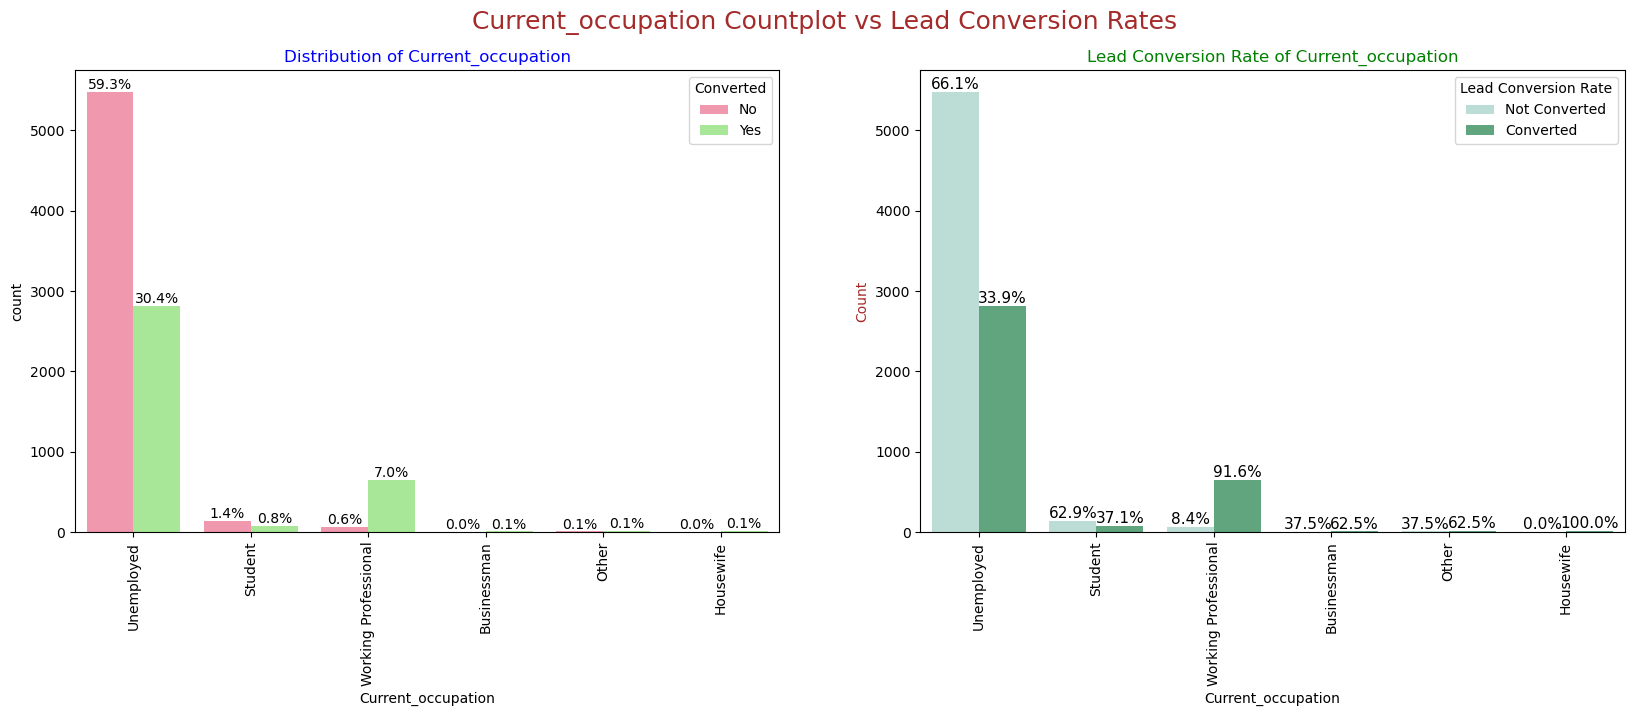

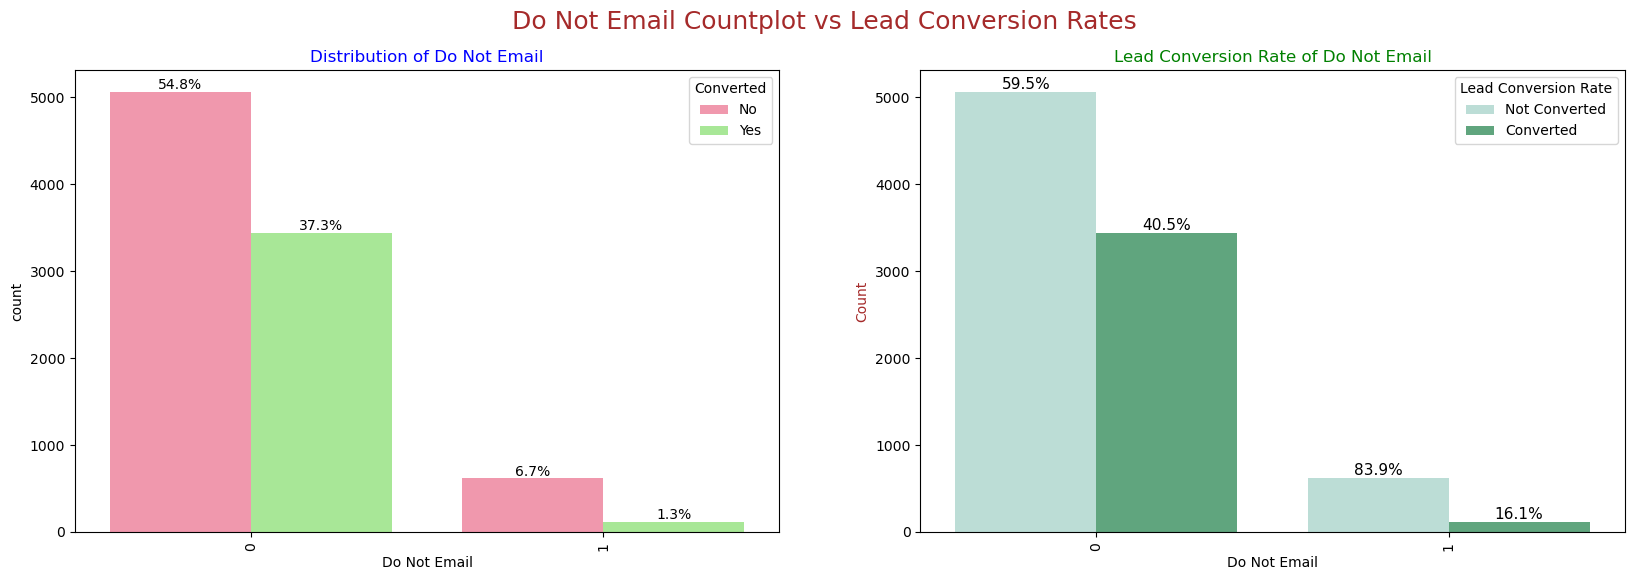

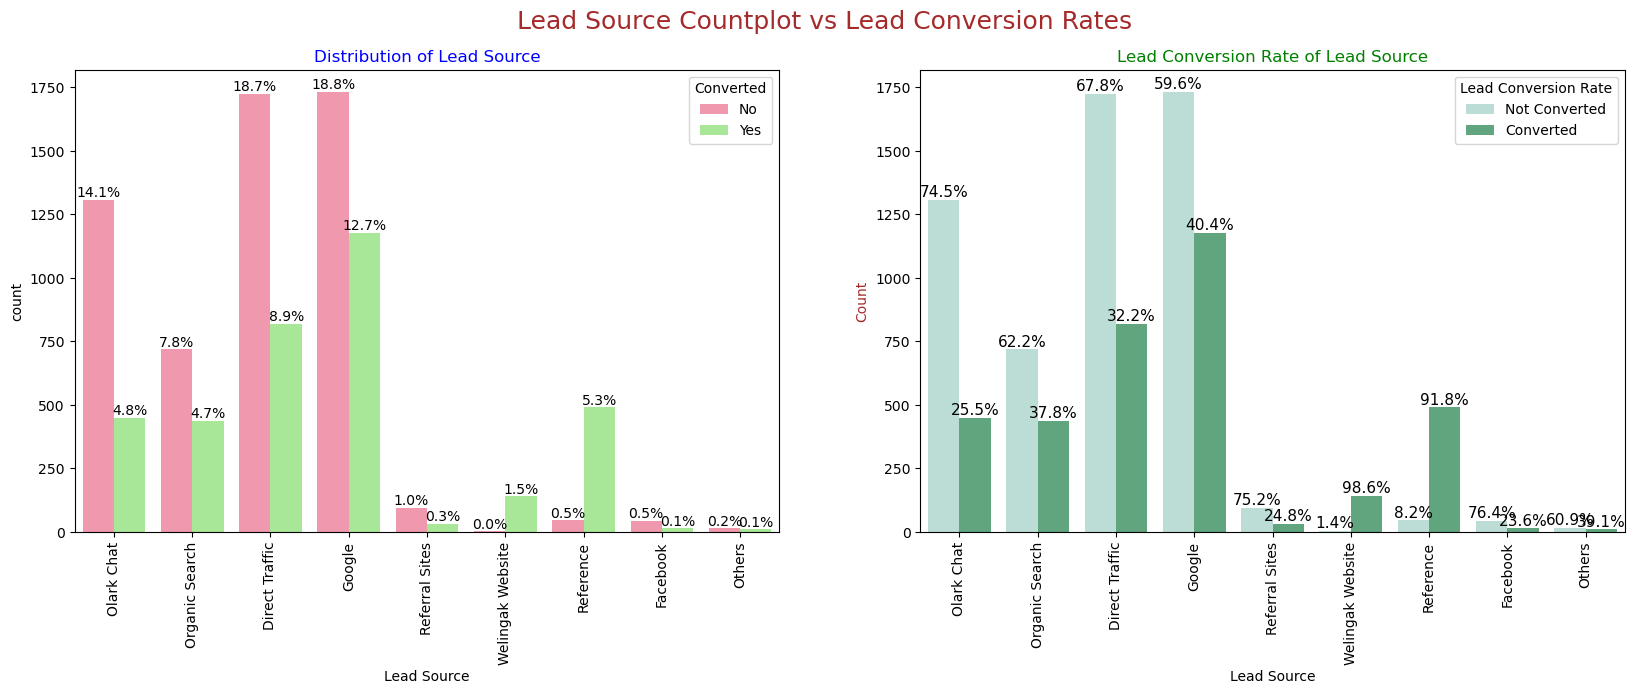

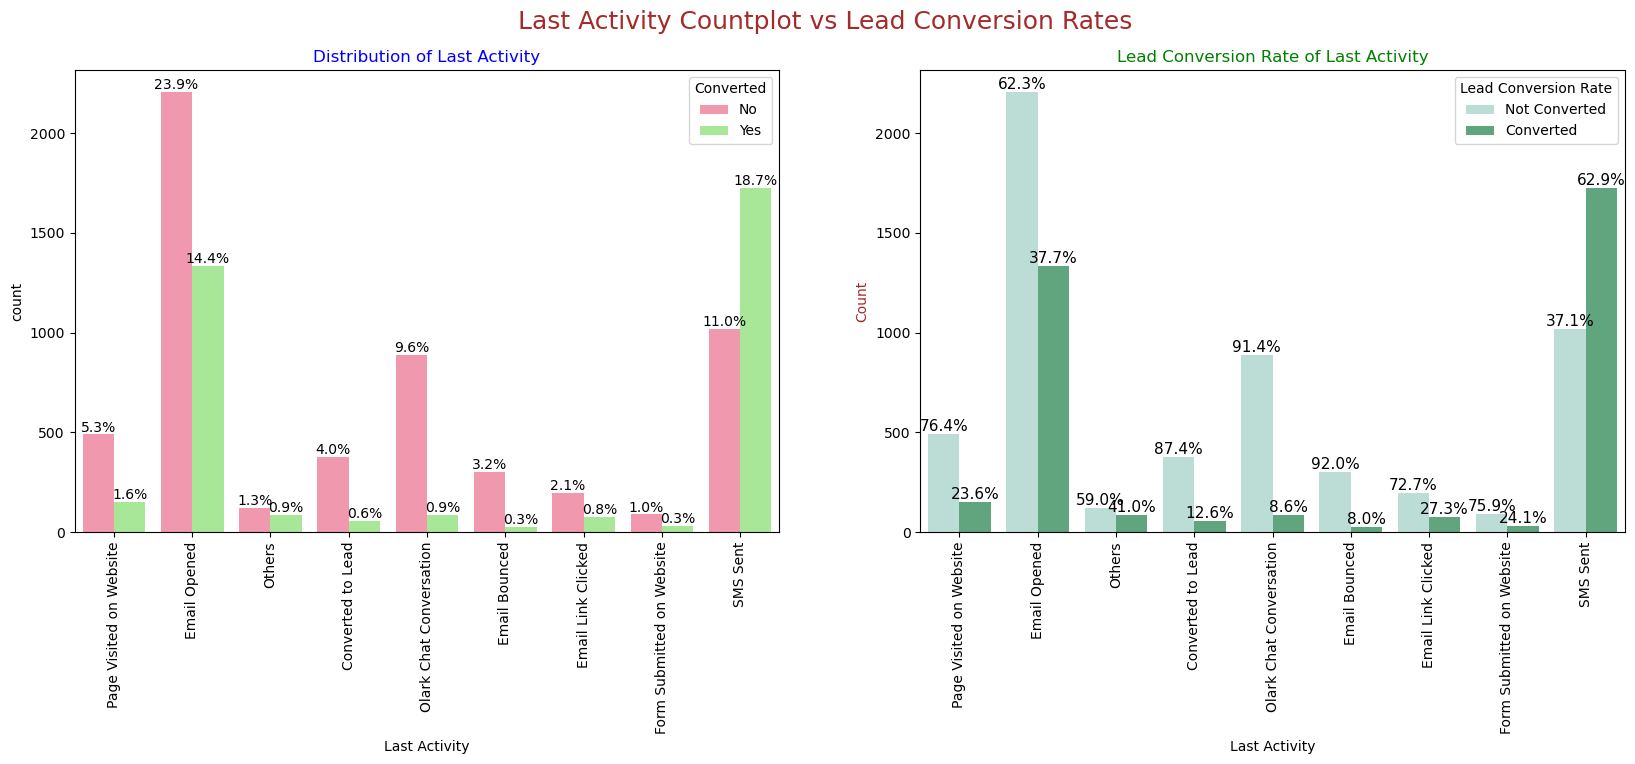

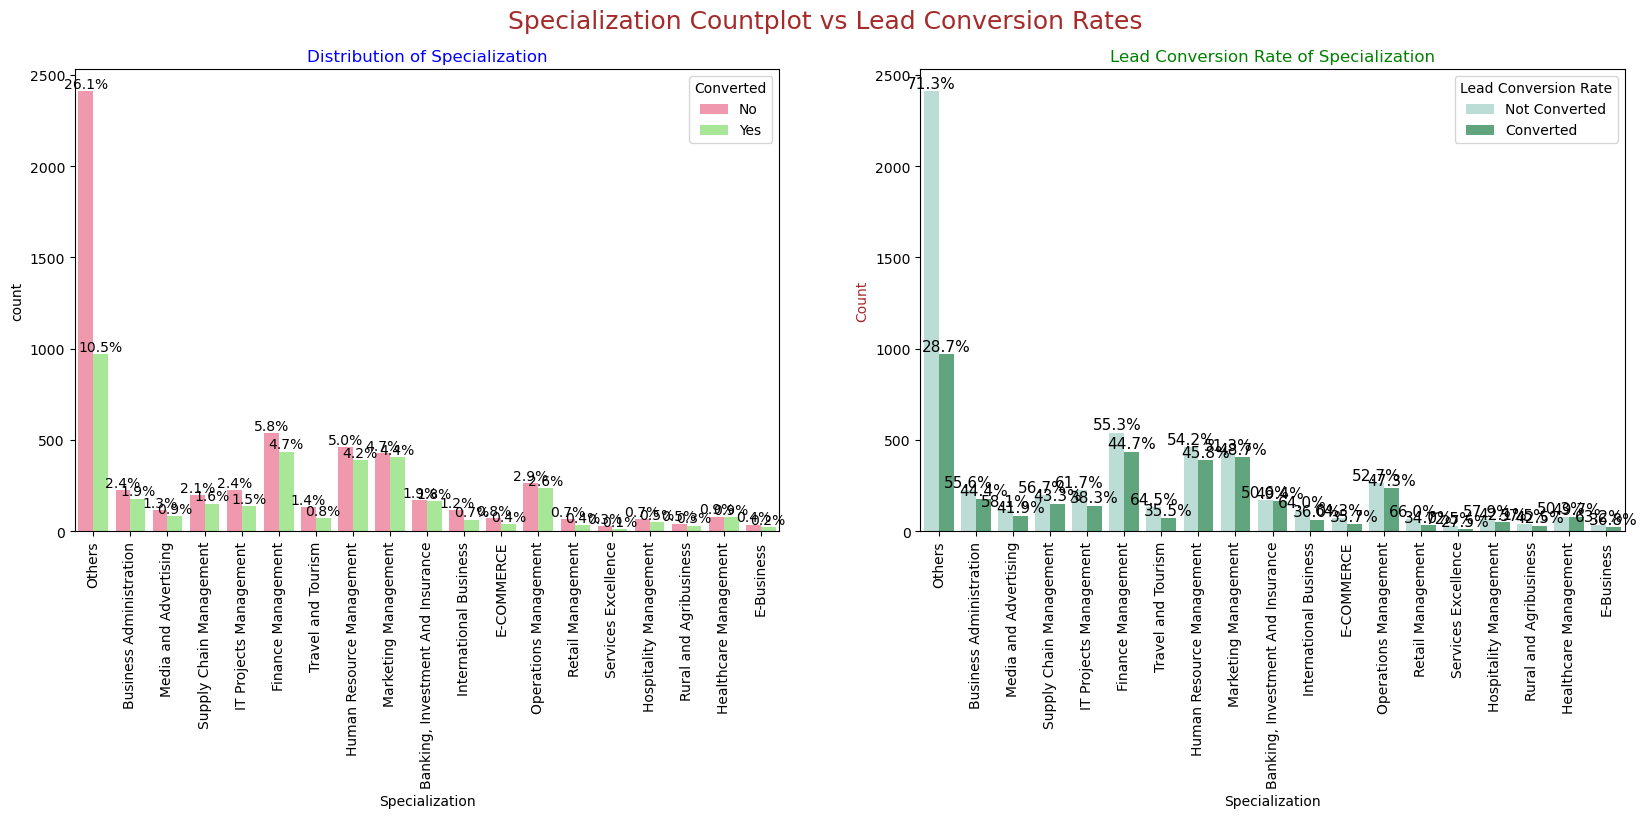

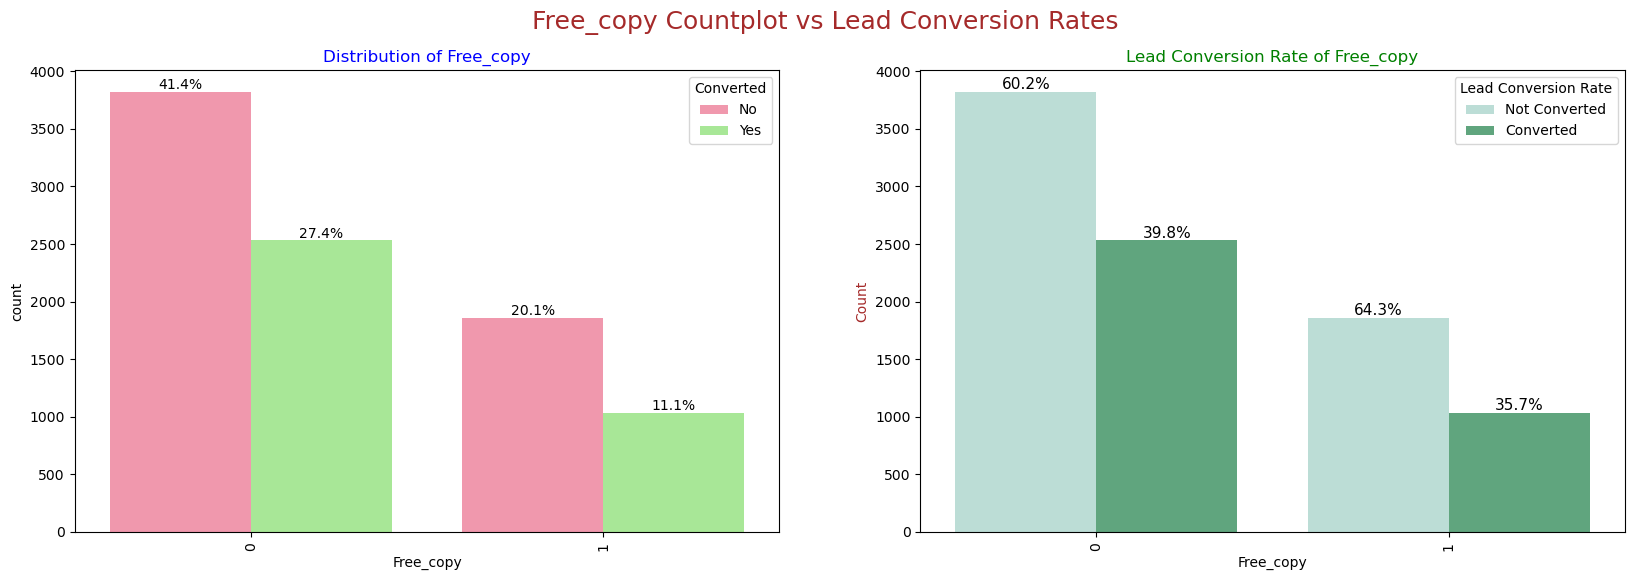

In [67]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(df_leads,variable_name=i)

In [68]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

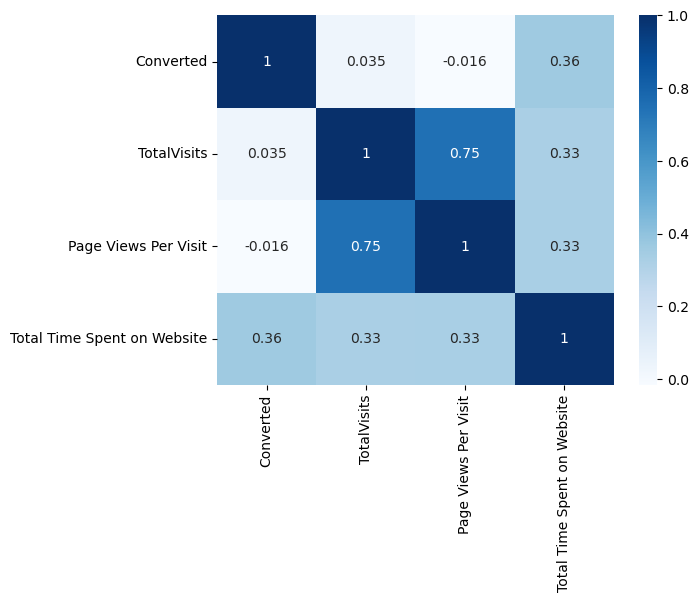

In [69]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

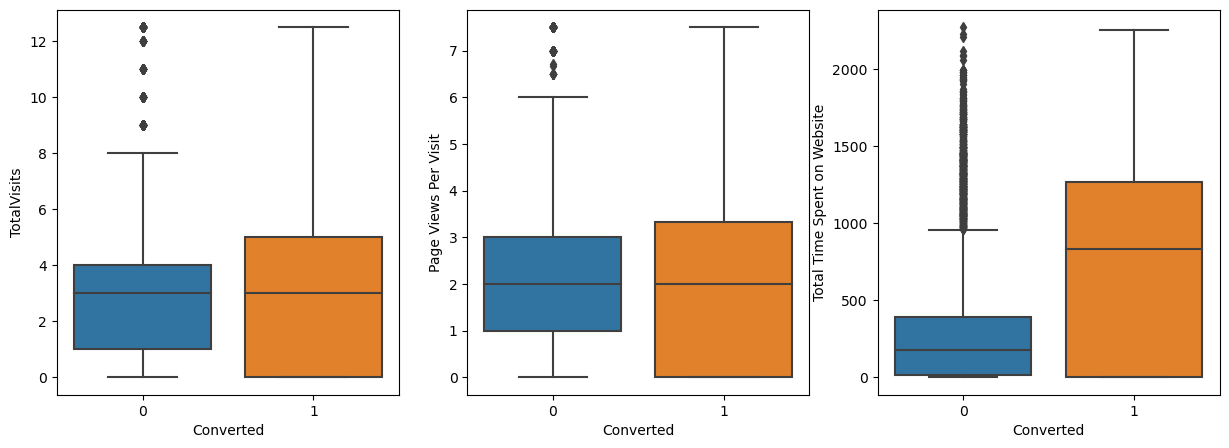

In [70]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

#### Dummy Variables
----
Now we can go for Dummy Varibale creartion

For categorical (non Binary) variables with multiple levels, create dummy features 

In [71]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [72]:
df_leads.shape

(9240, 11)

In [73]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]],
                       drop_first=True)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [74]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0          0                                False                      False   
1          0                                False                      False   
2          1                                 True                      False   
3          0                                 True                      False   
4          0                                 True                      False   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                    False                       False                 False   
1                    False                       False                 False   
2                    False                       False                 False   
3                    False                       False                 False   
4                    False                       False                 False   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0               False                    True                       False   
1               False                   False                        True   
2               False                   False                       False   
3               False                   False                       False   
4                True                   False                       False   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0               False                  False                       False   
1               False                  False                       False   
2               False                  False                       False   
3               False                  False                       False   
4               False                  False                       False   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                             False                       False   
1                             False                        True   
2                             False                        True   
3                             False                       False   
4                             False                       False   

   Last Activity_Form Submitted on Website  \
0           

In [75]:
df_leads.shape

(9240, 54)

In [76]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 54 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   int64  
 3   Converted                                 9240 non-null   int64  
 4   TotalVisits                               9240 non-null   float64
 5   Total Time Spent on Website               9240 non-null   int64  
 6   Page Views Per Visit                      9240 non-null   float64
 7   Last Activity                             9240 non-null   object 
 8   Specialization                            9240 non-null   object 
 9   Current_occupation                        9240 non-null   object 
 10  Free_copy                           

In [77]:
df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],axis=1,inplace=True)

In [78]:
df_leads.shape

(9240, 49)

In [79]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   bool   
 7   Lead Origin_Lead Add Form                 9240 non-null   bool   
 8   Lead Origin_Lead Import                   9240 non-null   bool   
 9   Lead Origin_Quick Add Form                9240 non-null   bool   
 10  Lead Source_Facebook                

In [80]:
df_leads.replace({False: 0, True: 1}, inplace=True)

In [81]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   int64  
 7   Lead Origin_Lead Add Form                 9240 non-null   int64  
 8   Lead Origin_Lead Import                   9240 non-null   int64  
 9   Lead Origin_Quick Add Form                9240 non-null   int64  
 10  Lead Source_Facebook                

## Train-Test Split


In [82]:
# Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]

In [83]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [84]:
X_train.shape , y_train.shape

((6468, 48), (6468,))

## Feature Scaling

In [85]:
# using standard scaler for scaling the features
scaler = MinMaxScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [86]:
# X-train dataframe after scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4715           0.0         0.00                     0.000000   
7132           0.0         0.16                     0.549296   
8954           0.0         0.32                     0.170335   
5283           1.0         1.00                     0.532130   
3003           0.0         0.24                     0.595951   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
4715              0.000000        0.0                                  0.0   
7132              0.133333        0.0                                  0.0   
8954              0.177333        1.0                                  1.0   
5283              1.000000        0.0                                  1.0   
3003              0.400000        1.0                                  1.0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
4715                        0.0                      0.0   
7132                        0.0                      0.0   
8954                        0.0                      0.0   
5283                        0.0                      0.0   
3003                        0.0                      0.0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
4715                         0.0                   0.0                 0.0   
7132                         0.0                   0.0                 0.0   
8954                         0.0                   0.0                 0.0   
5283                         0.0                   0.0                 0.0   
3003                         0.0                   0.0                 0.0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
4715                     1.0                         0.0                 0.0   
7132                     0.0                         1.0                 0.0   
8954                     0.0                         0.0                 0.0   
5283                     0.0                         0.0                 0.0   
3003                     0.0                         0.0                 0.0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4715                    0.0                         0.0   
7132                    0.0                         0.0   
8954                    0.0                         0.0   
5283                    0.0                         0.0   
3003                    0.0                         0.0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
4715                           0.0                          0.0   
7132                           0.0                          0.0   
8954                           0.0                          0.0   
5283                           0.0                          0.0   
3003                           0.0                          0.0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
4715                               0.0                         1.0   
7132                               0.0                         1.0   
8954                               0.0                         0.0   
5283                               0.0                         0.0   
3003                               0.0                         0.0   

      Last Activity_Form Submitted on Website  \
4715                                      0.0   
7132                                      0.0   
8954                                      0.0   
5283                                      0.0   
3003                                      0.0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4715                                    0.0                   0.0   
7132                                    0.0                   0.0   
8954                                    0.0                   0.0   
5283                                    0.0                   0.0   
3003                  

In [87]:
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4608           0.0         0.64                     0.114182   
7935           1.0         0.16                     0.420933   
4043           1.0         0.08                     0.000906   
7821           0.0         0.16                     0.146353   
856            0.0         0.24                     0.091074   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
4608              0.356000        1.0                                  1.0   
7935              0.266667        1.0                                  1.0   
4043              0.133333        0.0                                  1.0   
7821              0.266667        0.0                                  1.0   
856               0.400000        0.0                                  1.0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
4608                        0.0                      0.0   
7935                        0.0                      0.0   
4043                        0.0                      0.0   
7821                        0.0                      0.0   
856                         0.0                      0.0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
4608                         0.0                   0.0                 1.0   
7935                         0.0                   0.0                 0.0   
4043                         0.0                   0.0                 0.0   
7821                         0.0                   0.0                 0.0   
856                          0.0                   0.0                 1.0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
4608                     0.0                         0.0                 0.0   
7935                     0.0                         0.0                 0.0   
4043                     0.0                         0.0                 0.0   
7821                     0.0                         0.0                 0.0   
856                      0.0                         0.0                 0.0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4608                    0.0                         0.0   
7935                    0.0                         0.0   
4043                    0.0                         0.0   
7821                    0.0                         0.0   
856                     0.0                         0.0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
4608                           0.0                          0.0   
7935                           0.0                          1.0   
4043                           0.0                          1.0   
7821                           0.0                          0.0   
856                            0.0                          0.0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
4608                               0.0                         1.0   
7935                               0.0                         0.0   
4043                               0.0                         0.0   
7821                               0.0                         1.0   
856                                0.0                         1.0   

      Last Activity_Form Submitted on Website  \
4608                                      0.0   
7935                                      0.0   
4043                                      0.0   
7821                                      0.0   
856                                       0.0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4608                                    0.0                   0.0   
7935                                    0.0                   0.0   
4043                                    0.0                   0.0   
7821                                    0.0                   0.0   
856                   

In [88]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

#### Looking at Correlations


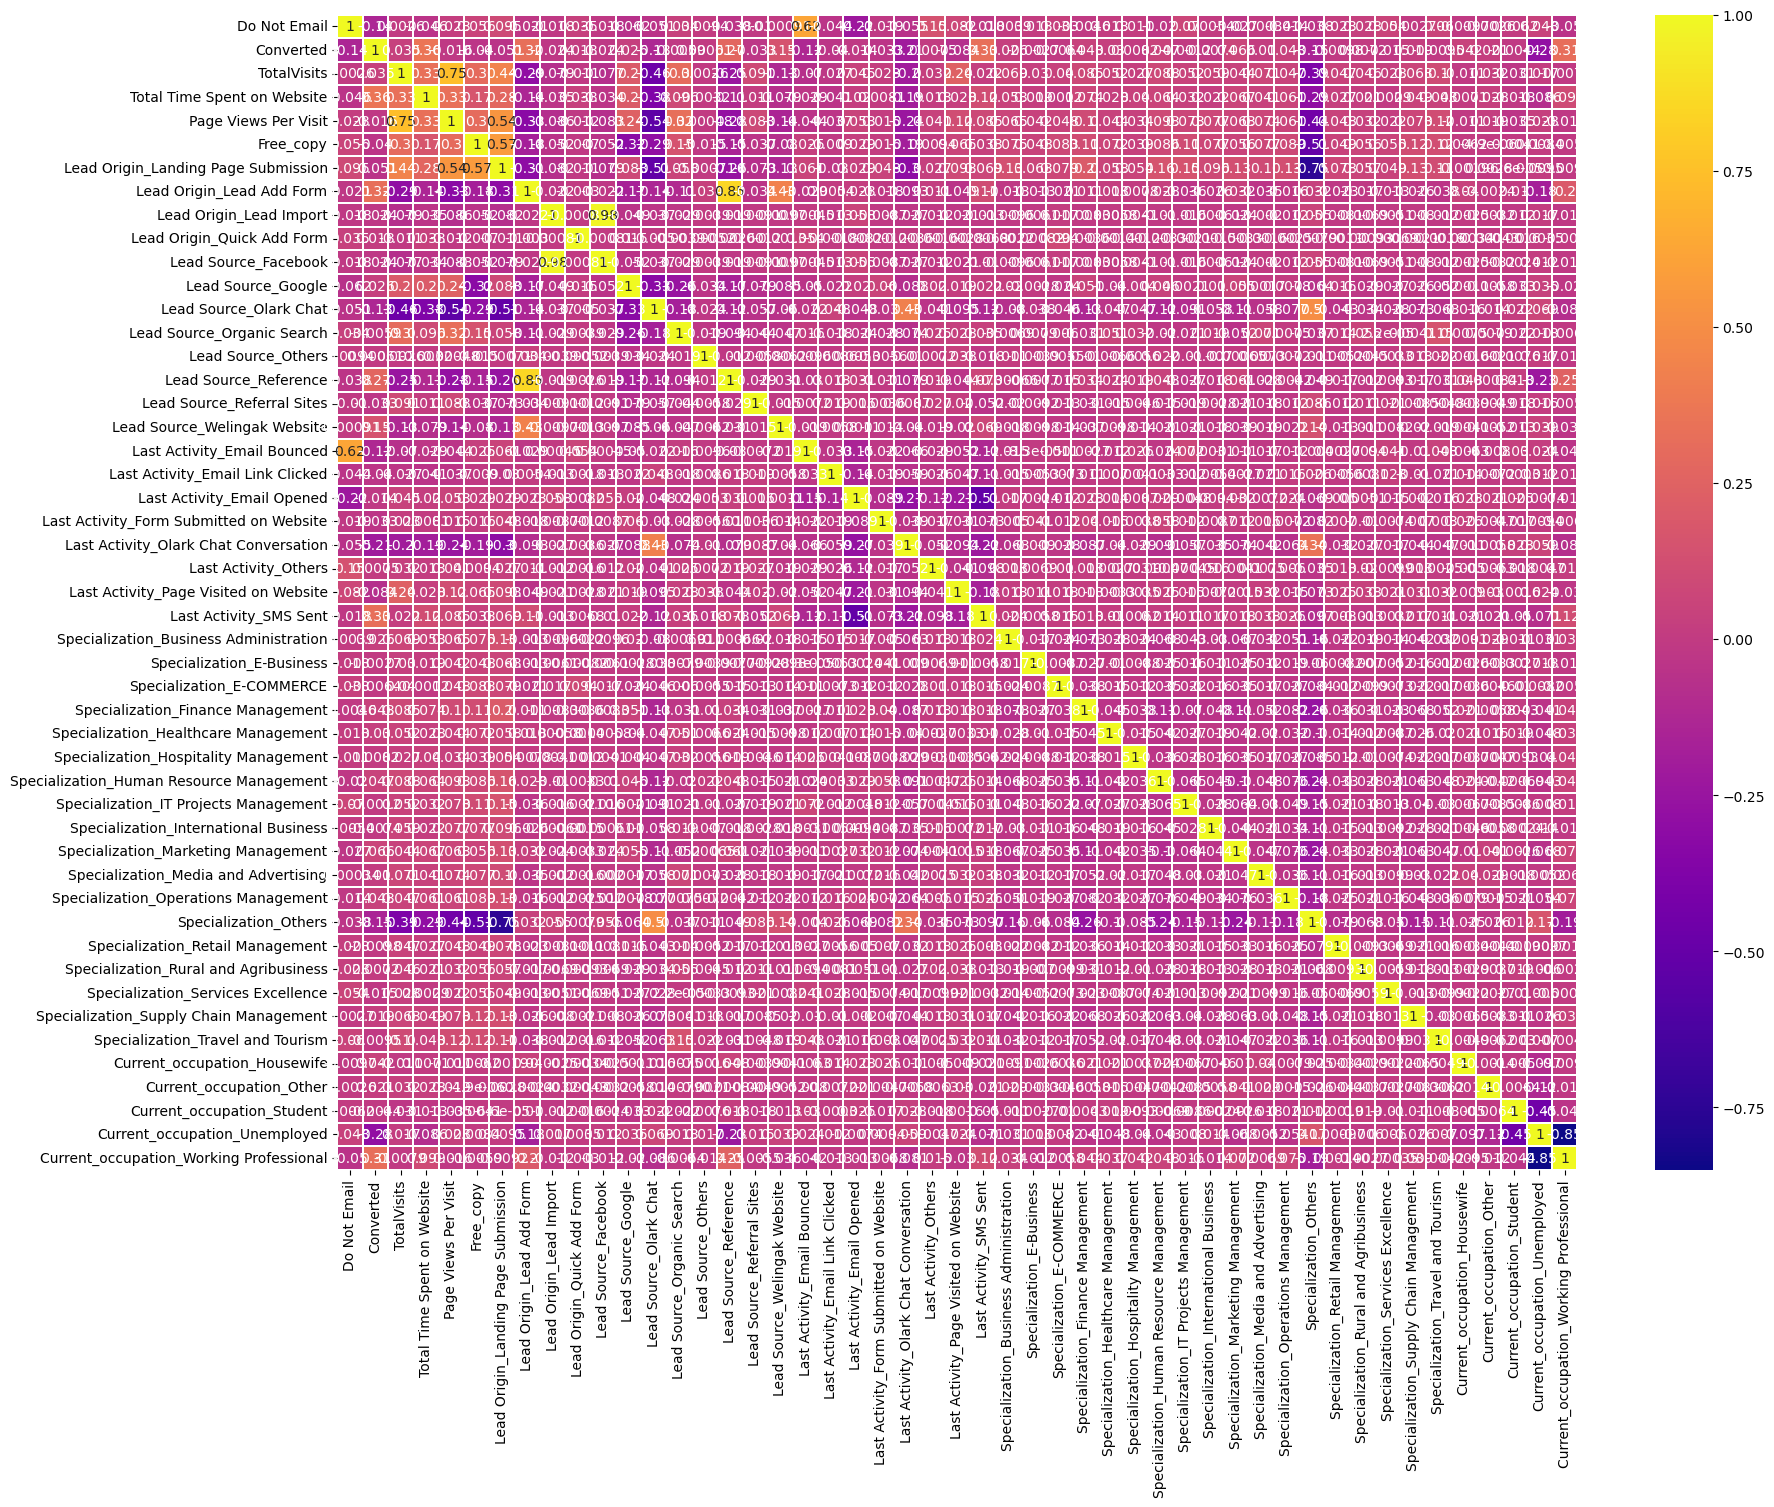

In [89]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="plasma",annot=True)
plt.show()

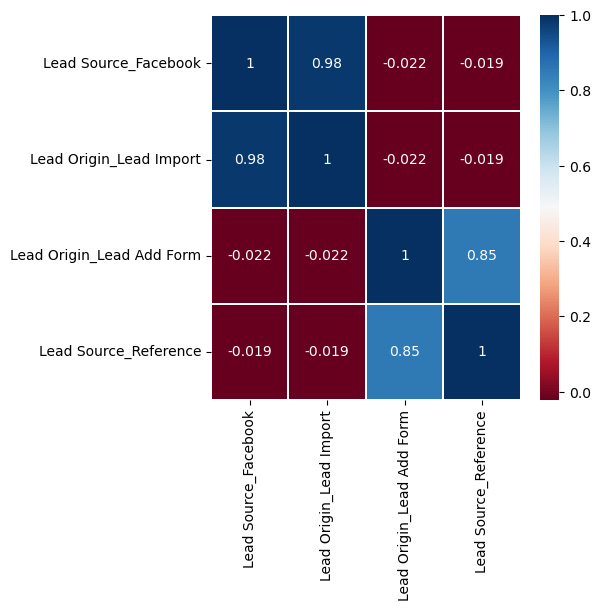

In [90]:
# as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))        
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form",
                      "Lead Source_Reference"]].corr(),linewidths=0.01,cmap="RdBu",annot=True)
plt.show()

These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'.

In [91]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

# Model Building
----
- We will Build Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE (Coarse tuning)
- Manual fine-tuning using p-values and VIFs

## Feature Selection Using RFE (Recursive Feature Elimination)


In [92]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [93]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Free_copy', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 15),
 ('Lead Source_Facebook', False, 6),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 12),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 27),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 9),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 23),

In [94]:
# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
0                               Do Not Email            True        1
41              Current_occupation_Housewife            True        1
35                     Specialization_Others            True        1
28     Specialization_Hospitality Management            True        1
20                      Last Activity_Others            True        1
19     Last Activity_Olark Chat Conversation            True        1
14              Lead Source_Welingak Website            True        1
12                     Lead Source_Reference            True        1
11                        Lead Source_Others            True        1
22                    Last Activity_SMS Sent            True        1
45   Current_occupation_Working Professional            True        1
2                Total Time Spent on Website            True        1
1                                TotalVisits            True        1
5        Lead Origin_Landing Page Submission            True        1
3                       Page Views Per Visit            True        1
9                     Lead Source_Olark Chat           False        2
44             Current_occupation_Unemployed           False        3
43                Current_occupation_Student           False        4
17                Last Activity_Email Opened           False        5
7                       Lead Source_Facebook           False        6
4                                  Free_copy           False        7
16          Last Activity_Email Link Clicked           False        8
21     Last Activity_Page Visited on Website           False        9
31     Specialization_International Business           False       10
33      Specialization_Media and Advertising           False       11
15               Last Activity_Email Bounced           False       12
38        Specialization_Services Excellence           False       13
29  Specialization_Human Resource Management           False       14
6                 Lead Origin_Quick Add Form           False       15
10                Lead Source_Organic Search           False       16
8                         Lead Source_Google           False       17
34      Specialization_Operations Management           False       18
36          Specialization_Retail Management           False       19
42                  Current_occupation_Other           False       20
24                 Specialization_E-Business           False       21
40         Specialization_Travel and Tourism           False       22
23    Specialization_Business Administration           False       23
26         Specialization_Finance Management           False       24
30     Specialization_IT Projects Management           False       25
39    Specialization_Supply Chain Management           False       26
18   Last Activity_Form Submitted on Website           False       27
37     Specialization_Rural and Agribusiness           False       28
32       Specialization_Marketing Management           False       29
27      Specialization_Healthcare Management           False       30
25                 Specialization_E-COMMERCE           False       31
13                Lead Source_Referral Sites           False       32

In [95]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [96]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Free_copy', 'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Ser

In [97]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

## Model 1


In [98]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                      -0.742262
Do Not Email                               -1.296287
TotalVisits                                 1.039113
Total Time Spent on Website                 3.942327
Page Views Per Visit                       -1.497716
Lead Origin_Landing Page Submission        -1.284029
Lead Source_Others                          0.844562
Lead Source_Reference                       2.477780
Lead Source_Welingak Website               25.540664
Last Activity_Olark Chat Conversation      -1.136740
Last Activity_Others                        0.912874
Last Activity_SMS Sent                      1.484129
Specialization_Hospitality Management      -0.916293
Specialization_Others                      -1.127611
Current_occupation_Housewife               24.609811
Current_occupation_Working Professional     2.425975
dtype: float64

In [99]:
#Let's see the summary of our logistic regression model
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2801.8
Date:                Mon, 17 Jun 2024   Deviance:                       5603.7
Time:                        13:52:10   Pearson chi2:                 6.91e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3723
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7423      0.120     -6.202      0.000      -0.977      -0.508
Do Not Email                               -1.2963      0.155     -8.344      0.000      -1.601      -0.992
TotalVisits                                 1.0391      0.194      5.354      0.000       0.659       1.419
Total Time Spent on Website                 3.9423      0.151     26.185      0.000       3.647       4.237
Page Views Per Visit                       -1.4977      0.205     -7.293      0.000      -1.900      -1.095
Lead Origin_Landing Page Submission        -1.2840      0.115    -11.124      0.000      -1.510      -1.058
Lead Source_Others                          0.8446      0.576      1.466      0.143      -0.284       1.973
Lead Source_Reference                       2.4778      0.219     11.335      0.000       2.049       2.906
Lead Source_Welingak Website               25.5407   1.37e+04      0.002      0.999   -2.68e+04    2.69e+04
Last Activity_Olark Chat Conversation      -1.1367      0.160     -7.105      0.000      -1.450      -0.823
Last Activity_Others                        0.9129      0.218      4.179      0.000       0.485       1.341
Last Activity_SMS Sent                      1.4841      0.073     20.226      0.000       1.340       1.628
Specialization_Hospitality Management      -0.9163      0.311     -2.947      0.003      -1.526      -0.307
Specialization_Others                      -1.1276      0.117     -9.608      0.000      -1.358      -0.898
Current_occupation_Housewife               24.6098   4.38e+04      0.001      1.000   -8.59e+04    8.59e+04
Current_occupation_Working Professional     2.4260      0.182     13.300      0.000       2.068       2.783
===========================================================================================================
"""

"Current_occupation_Housewife" column will be removed from model due to high p-value of 1, which is above the accepted threshold of 0.05 for statistical significance.

### Model 2
---
let's drop col "Current_occupation_Housewife"

In [100]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [101]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                      -0.735761
Do Not Email                               -1.299692
TotalVisits                                 1.027048
Total Time Spent on Website                 3.948225
Page Views Per Visit                       -1.493579
Lead Origin_Landing Page Submission        -1.281789
Lead Source_Others                          0.840524
Lead Source_Reference                       2.487839
Lead Source_Welingak Website               25.540642
Last Activity_Olark Chat Conversation      -1.139853
Last Activity_Others                        0.907631
Last Activity_SMS Sent                      1.478179
Specialization_Hospitality Management      -0.921979
Specialization_Others                      -1.131637
Current_occupation_Working Professional     2.420815
dtype: float64

In [102]:
#Let's see the summary of our logistic regression model
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2806.8
Date:                Mon, 17 Jun 2024   Deviance:                       5613.5
Time:                        13:52:10   Pearson chi2:                 6.93e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3713
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7358      0.120     -6.153      0.000      -0.970      -0.501
Do Not Email                               -1.2997      0.155     -8.366      0.000      -1.604      -0.995
TotalVisits                                 1.0270      0.194      5.295      0.000       0.647       1.407
Total Time Spent on Website                 3.9482      0.150     26.236      0.000       3.653       4.243
Page Views Per Visit                       -1.4936      0.205     -7.277      0.000      -1.896      -1.091
Lead Origin_Landing Page Submission        -1.2818      0.115    -11.115      0.000      -1.508      -1.056
Lead Source_Others                          0.8405      0.576      1.459      0.144      -0.288       1.969
Lead Source_Reference                       2.4878      0.218     11.391      0.000       2.060       2.916
Lead Source_Welingak Website               25.5406   1.37e+04      0.002      0.999   -2.68e+04    2.69e+04
Last Activity_Olark Chat Conversation      -1.1399      0.160     -7.124      0.000      -1.453      -0.826
Last Activity_Others                        0.9076      0.219      4.154      0.000       0.479       1.336
Last Activity_SMS Sent                      1.4782      0.073     20.160      0.000       1.334       1.622
Specialization_Hospitality Management      -0.9220      0.311     -2.965      0.003      -1.531      -0.313
Specialization_Others                      -1.1316      0.117     -9.647      0.000      -1.362      -0.902
Current_occupation_Working Professional     2.4208      0.182     13.272      0.000       2.063       2.778
===========================================================================================================
"""

"Lead Source_Welingak Website" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.



### Model 3
---
let's drop col "Lead Source_Welingak Website	"

In [103]:
# Dropping 'Lead Source_Welingak Website' column
rfe_col=rfe_col.drop("Lead Source_Welingak Website")

In [104]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                     -0.604121
Do Not Email                              -1.239696
TotalVisits                                0.960733
Total Time Spent on Website                3.873833
Page Views Per Visit                      -1.659074
Lead Origin_Landing Page Submission       -1.308266
Lead Source_Others                         0.753450
Lead Source_Reference                      2.310780
Last Activity_Olark Chat Conversation     -1.276471
Last Activity_Others                       0.877784
Last Activity_SMS Sent                     1.508328
Specialization_Hospitality Management     -0.907964
Specialization_Others                     -1.045139
Current_occupation_Working Professional    2.406553
dtype: float64

In [105]:
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2897.6
Date:                Mon, 17 Jun 2024   Deviance:                       5795.3
Time:                        13:52:10   Pearson chi2:                 6.96e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3534
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.6041      0.118     -5.117      0.000      -0.836      -0.373
Do Not Email                               -1.2397      0.150     -8.282      0.000      -1.533      -0.946
TotalVisits                                 0.9607      0.193      4.974      0.000       0.582       1.339
Total Time Spent on Website                 3.8738      0.150     25.850      0.000       3.580       4.168
Page Views Per Visit                       -1.6591      0.205     -8.104      0.000      -2.060      -1.258
Lead Origin_Landing Page Submission        -1.3083      0.115    -11.416      0.000      -1.533      -1.084
Lead Source_Others                          0.7534      0.577      1.306      0.192      -0.378       1.884
Lead Source_Reference                       2.3108      0.217     10.631      0.000       1.885       2.737
Last Activity_Olark Chat Conversation      -1.2765      0.158     -8.089      0.000      -1.586      -0.967
Last Activity_Others                        0.8778      0.217      4.042      0.000       0.452       1.303
Last Activity_SMS Sent                      1.5083      0.072     20.926      0.000       1.367       1.650
Specialization_Hospitality Management      -0.9080      0.311     -2.923      0.003      -1.517      -0.299
Specialization_Others                      -1.0451      0.116     -9.025      0.000      -1.272      -0.818
Current_occupation_Working Professional     2.4066      0.182     13.215      0.000       2.050       2.763
===========================================================================================================
"""

"Lead Source_Others" column will be removed from model due to high p-value of 0.192, which is above the accepted threshold of 0.05 for statistical significance.



### Model 4
---
let's drop col "Lead Source_Others"

In [106]:
# Dropping 'Lead Source_Others	' column
rfe_col=rfe_col.drop("Lead Source_Others")

In [107]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                     -0.597460
Do Not Email                              -1.239182
TotalVisits                                0.957809
Total Time Spent on Website                3.872438
Page Views Per Visit                      -1.661952
Lead Origin_Landing Page Submission       -1.309800
Lead Source_Reference                      2.305779
Last Activity_Olark Chat Conversation     -1.275779
Last Activity_Others                       0.881467
Last Activity_SMS Sent                     1.506770
Specialization_Hospitality Management     -0.909668
Specialization_Others                     -1.047536
Current_occupation_Working Professional    2.404031
dtype: float64

In [108]:
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2898.5
Date:                Mon, 17 Jun 2024   Deviance:                       5796.9
Time:                        13:52:10   Pearson chi2:                 6.95e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3532
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.5975      0.118     -5.065      0.000      -0.829      -0.366
Do Not Email                               -1.2392      0.150     -8.281      0.000      -1.532      -0.946
TotalVisits                                 0.9578      0.193      4.960      0.000       0.579       1.336
Total Time Spent on Website                 3.8724      0.150     25.841      0.000       3.579       4.166
Page Views Per Visit                       -1.6620      0.205     -8.120      0.000      -2.063      -1.261
Lead Origin_Landing Page Submission        -1.3098      0.115    -11.428      0.000      -1.534      -1.085
Lead Source_Reference                       2.3058      0.217     10.610      0.000       1.880       2.732
Last Activity_Olark Chat Conversation      -1.2758      0.158     -8.094      0.000      -1.585      -0.967
Last Activity_Others                        0.8815      0.217      4.057      0.000       0.456       1.307
Last Activity_SMS Sent                      1.5068      0.072     20.911      0.000       1.366       1.648
Specialization_Hospitality Management      -0.9097      0.311     -2.929      0.003      -1.518      -0.301
Specialization_Others                      -1.0475      0.116     -9.046      0.000      -1.275      -0.821
Current_occupation_Working Professional     2.4040      0.182     13.203      0.000       2.047       2.761
===========================================================================================================
"""

Above model is a stable model where P values are within threshold value of 0.05


Let's check VIF for above model and find out if we have any multicolinearity present 

In [109]:
# Now checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

Features   VIF
0                      Page Views Per Visit  6.15
1                               TotalVisits  4.80
2       Lead Origin_Landing Page Submission  3.35
3               Total Time Spent on Website  2.06
4                     Specialization_Others  1.63
5                    Last Activity_SMS Sent  1.51
6     Last Activity_Olark Chat Conversation  1.33
7   Current_occupation_Working Professional  1.21
8                     Lead Source_Reference  1.16
9                              Do Not Email  1.12
10                     Last Activity_Others  1.06
11    Specialization_Hospitality Management  1.02

Feature : Page Views Per Visit is having a VIF score greater than 5, we can drop this column

### Model 5
---
let's drop col "Page Views Per Visit	"

In [110]:
# Dropping 'Page Views Per Visit ' column
rfe_col=rfe_col.drop("Page Views Per Visit")

In [111]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm5 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm5 = sm.GLM(y_train,X_train_sm5,family = sm.families.Binomial()).fit()  

logm5.params

const                                     -0.742599
Do Not Email                              -1.234078
TotalVisits                               -0.020090
Total Time Spent on Website                3.731903
Lead Origin_Landing Page Submission       -1.459214
Lead Source_Reference                      2.448896
Last Activity_Olark Chat Conversation     -1.234224
Last Activity_Others                       0.798174
Last Activity_SMS Sent                     1.438869
Specialization_Hospitality Management     -0.920066
Specialization_Others                     -0.997563
Current_occupation_Working Professional    2.382628
dtype: float64

In [112]:
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2932.5
Date:                Mon, 17 Jun 2024   Deviance:                       5865.0
Time:                        13:52:11   Pearson chi2:                 6.85e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3464
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7426      0.116     -6.404      0.000      -0.970      -0.515
Do Not Email                               -1.2341      0.149     -8.284      0.000      -1.526      -0.942
TotalVisits                                -0.0201      0.154     -0.131      0.896      -0.321       0.281
Total Time Spent on Website                 3.7319      0.147     25.369      0.000       3.444       4.020
Lead Origin_Landing Page Submission        -1.4592      0.112    -12.980      0.000      -1.680      -1.239
Lead Source_Reference                       2.4489      0.216     11.327      0.000       2.025       2.873
Last Activity_Olark Chat Conversation      -1.2342      0.157     -7.837      0.000      -1.543      -0.926
Last Activity_Others                        0.7982      0.215      3.709      0.000       0.376       1.220
Last Activity_SMS Sent                      1.4389      0.071     20.323      0.000       1.300       1.578
Specialization_Hospitality Management      -0.9201      0.310     -2.964      0.003      -1.529      -0.312
Specialization_Others                      -0.9976      0.115     -8.700      0.000      -1.222      -0.773
Current_occupation_Working Professional     2.3826      0.181     13.174      0.000       2.028       2.737
===========================================================================================================
"""

In [113]:
get_vif(X_train_rfe)

Features   VIF
0       Lead Origin_Landing Page Submission  2.81
1                               TotalVisits  2.68
2               Total Time Spent on Website  2.04
3                     Specialization_Others  1.60
4                    Last Activity_SMS Sent  1.49
5     Last Activity_Olark Chat Conversation  1.33
6   Current_occupation_Working Professional  1.21
7                     Lead Source_Reference  1.16
8                              Do Not Email  1.12
9                      Last Activity_Others  1.06
10    Specialization_Hospitality Management  1.02

No variable needs to be dropped as they all have good VIF values less than 5.
but we have "TotalVisits" which is having p-value as 0.896, we can drop this

### Model 6
---
let's drop col "TotalVisits	"

In [114]:
# Dropping 'TotalVisits ' column
rfe_col=rfe_col.drop("TotalVisits")

In [115]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm6 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm6 = sm.GLM(y_train,X_train_sm6,family = sm.families.Binomial()).fit()  

logm6.params

const                                     -0.747447
Do Not Email                              -1.233520
Total Time Spent on Website                3.728121
Lead Origin_Landing Page Submission       -1.460701
Lead Source_Reference                      2.452747
Last Activity_Olark Chat Conversation     -1.233647
Last Activity_Others                       0.797072
Last Activity_SMS Sent                     1.439265
Specialization_Hospitality Management     -0.919980
Specialization_Others                     -0.995661
Current_occupation_Working Professional    2.382908
dtype: float64

In [116]:
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2932.5
Date:                Mon, 17 Jun 2024   Deviance:                       5865.1
Time:                        13:52:11   Pearson chi2:                 6.85e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3464
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.7474      0.110     -6.802      0.000      -0.963      -0.532
Do Not Email                               -1.2335      0.149     -8.284      0.000      -1.525      -0.942
Total Time Spent on Website                 3.7281      0.144     25.851      0.000       3.445       4.011
Lead Origin_Landing Page Submission        -1.4607      0.112    -13.060      0.000      -1.680      -1.241
Lead Source_Reference                       2.4527      0.214     11.451      0.000       2.033       2.873
Last Activity_Olark Chat Conversation      -1.2336      0.157     -7.836      0.000      -1.542      -0.925
Last Activity_Others                        0.7971      0.215      3.707      0.000       0.376       1.218
Last Activity_SMS Sent                      1.4393      0.071     20.347      0.000       1.301       1.578
Specialization_Hospitality Management      -0.9200      0.310     -2.964      0.003      -1.528      -0.312
Specialization_Others                      -0.9957      0.114     -8.755      0.000      -1.219      -0.773
Current_occupation_Working Professional     2.3829      0.181     13.176      0.000       2.028       2.737
===========================================================================================================
"""

In [117]:
get_vif(X_train_rfe)

Features   VIF
0      Lead Origin_Landing Page Submission  1.97
1              Total Time Spent on Website  1.87
2                    Specialization_Others  1.54
3                   Last Activity_SMS Sent  1.49
4    Last Activity_Olark Chat Conversation  1.33
5  Current_occupation_Working Professional  1.21
6                    Lead Source_Reference  1.15
7                             Do Not Email  1.12
8                     Last Activity_Others  1.05
9    Specialization_Hospitality Management  1.02

## Model Evaluation
---
- p-values for all variables is less than 0.05
- This model looks acceptable as everything is under control (p-values & VIFs).
- So we will final our Model 6 for Model Evaluation

On basis of below scores we will define our Model

- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [118]:
# Getting the predicted values on the train set
y_train_pred = logm6.predict(X_train_sm6)           # giving prob. of getting 1

y_train_pred[:10]

4715    0.148919
7132    0.575599
8954    0.466586
5283    0.079184
3003    0.810443
478     0.048487
1352    0.638135
3166    0.890558
7700    0.162634
2647    0.048487
dtype: float64

In [119]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14891857, 0.57559908, 0.46658597, 0.07918423, 0.81044326,
       0.04848709, 0.63813451, 0.89055757, 0.16263439, 0.04848709])

In [120]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

Converted  Converted_Prob  Prospect ID
0          0        0.148919         4715
1          1        0.575599         7132
2          0        0.466586         8954
3          0        0.079184         5283
4          0        0.810443         3003

Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [121]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.148919         4715          0
1          1        0.575599         7132          1
2          0        0.466586         8954          0
3          0        0.079184         5283          0
4          0        0.810443         3003          1

### Confusion Matrix

In [122]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
confusion

array([[3507,  477],
       [ 958, 1526]], dtype=int64)

In [123]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3507       |   477
# converted           958        |   1526  


# Above is the confusion matrix when we use threshold of probability as 0.5

### Accuracy

In [124]:
metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])

0.7781385281385281

### Metrics beyond simply accuracy
---
- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability


In [125]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6143317230273752


In [127]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8802710843373494


In [128]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.1197289156626506


In [129]:
# positive predictive value 
print (TP / float(TP+FP))

0.7618572141787319


In [130]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7854423292273236


#### Plotting the ROC Curve
-----
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [131]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [132]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], 
                                         y_train_pred_final["Converted_Prob"], drop_intermediate = False )


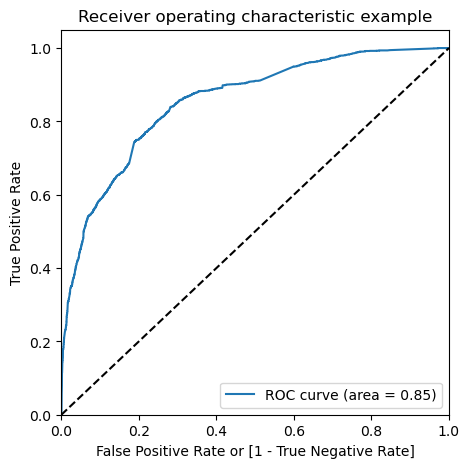

In [133]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

Above plot shows Area under ROC curve is 0.85 which defines a good predictive model

####  Finding Optimal Cutoff Point/ Probability
- It is that probability where we get balanced sensitivity and specificity


In [134]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.148919         4715          0    1    1    0    0    0   
1          1        0.575599         7132          1    1    1    1    1    1   
2          0        0.466586         8954          0    1    1    1    1    1   
3          0        0.079184         5283          0    1    0    0    0    0   
4          0        0.810443         3003          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    1    1    1    1    0

In [135]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.517007  0.990338  0.221888
0.2   0.2  0.728200  0.882850  0.631777
0.3   0.3  0.760049  0.847424  0.705572
0.4   0.4  0.779221  0.761675  0.790161
0.5   0.5  0.778139  0.614332  0.880271
0.6   0.6  0.780148  0.543881  0.927460
0.7   0.7  0.758349  0.448068  0.951807
0.8   0.8  0.735003  0.354670  0.972139
0.9   0.9  0.690012  0.203704  0.993223


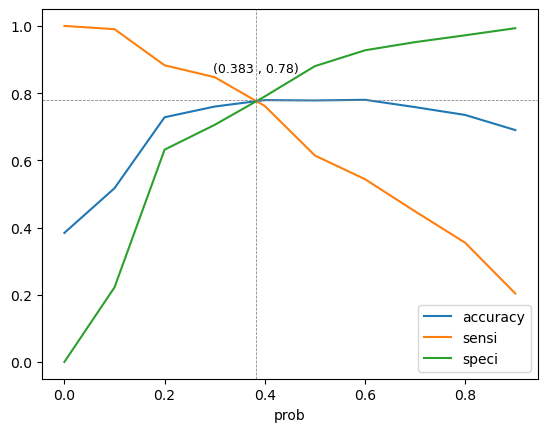

In [136]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

0.383 is the approx point where all the curves meet, so it seems to be our Optimal cutoff point for probability threshold .

Let us re-evaluate again withh cutoff as optimal cutoff point

In [137]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.148919         4715                0
1          1        0.575599         7132                1
2          0        0.466586         8954                1
3          0        0.079184         5283                0
4          0        0.810443         3003                1

### Calculating all metrics using confusion matrix for Train

In [138]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

0.7683982683982684

In [139]:
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [140]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[2957 1027]
 [ 471 2013]] 

************************************************** 

True Negative                    :  2957
True Positive                    :  2013
False Negative                   :  471
False Positve                    :  1027
Model Accuracy                   :  0.7684
Model Sensitivity                :  0.8104
Model Specificity                :  0.7422
Model Precision                  :  0.6622
Model Recall                     :  0.8104
Model True Positive Rate (TPR)   :  0.8104
Model False Positive Rate (FPR)  :  0.2578


************************************************** 



#### Precision and recall tradeoff
----
- Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [141]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

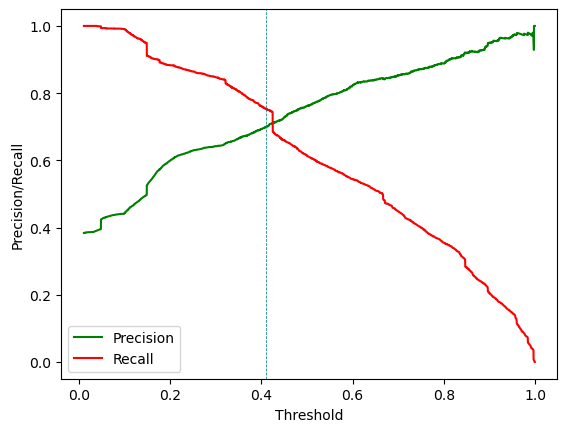

In [142]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.`

In [143]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [144]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  \
0          0        0.148919         4715                0   
1          1        0.575599         7132                1   
2          0        0.466586         8954                1   
3          0        0.079184         5283                0   
4          0        0.810443         3003                1   

   precision_recall_prediction  
0                            0  
1                            1  
2                            1  
3                            0  
4                            1

In [145]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3183  801]
 [ 613 1871]] 

************************************************** 

True Negative                    :  3183
True Positive                    :  1871
False Negative                   :  613
False Positve                    :  801
Model Accuracy                   :  0.7814
Model Sensitivity                :  0.7532
Model Specificity                :  0.7989
Model Precision                  :  0.7002
Model Recall                     :  0.7532
Model True Positive Rate (TPR)   :  0.7532
Model False Positive Rate (FPR)  :  0.2011


************************************************** 



- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.383. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

## Adding Lead Score Feature to Training dataframe
----
- A higher score would mean that the lead is hot, i.e. is most likely to convert
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [146]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.148919         4715                0          15
1          1        0.575599         7132                1          58
2          0        0.466586         8954                1          47
3          0        0.079184         5283                0           8
4          0        0.810443         3003                1          81

## Making Predictions on test set


Scaling Test dataset is already done above

In [147]:
X_test = X_test[rfe_col]

In [148]:
X_test.head()

Do Not Email  Total Time Spent on Website  \
4608           0.0                     0.114182   
7935           1.0                     0.420933   
4043           1.0                     0.000906   
7821           0.0                     0.146353   
856            0.0                     0.091074   

      Lead Origin_Landing Page Submission  Lead Source_Reference  \
4608                                  1.0                    0.0   
7935                                  1.0                    0.0   
4043                                  1.0                    0.0   
7821                                  1.0                    0.0   
856                                   1.0                    0.0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4608                                    0.0                   0.0   
7935                                    0.0                   0.0   
4043                                    0.0                   0.0   
7821                                    0.0                   0.0   
856                                     0.0                   0.0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4608                     0.0                                    0.0   
7935                     0.0                                    0.0   
4043                     0.0                                    0.0   
7821                     0.0                                    0.0   
856                      0.0                                    0.0   

      Specialization_Others  Current_occupation_Working Professional  
4608                    0.0                                      0.0  
7935                    0.0                                      0.0  
4043                    1.0                                      0.0  
7821                    1.0                                      1.0  
856                     0.0                                      0.0

In [149]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 11)

In [150]:
# making prediction using model 4 (final model)
y_test_pred = logm6.predict(X_test_sm)

In [151]:
# top 10 columns
y_test_pred[:10]

4608    0.143999
7935    0.133267
4043    0.011728
7821    0.431611
856     0.133702
927     0.089371
318     0.985658
1018    0.137263
8151    0.325559
1570    0.996040
dtype: float64

In [152]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4608  0.143999
7935  0.133267
4043  0.011728
7821  0.431611
856   0.133702

In [153]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4608          1
7935          0
4043          0
7821          0
856           0

In [154]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4608  0.143999
1          0         7935  0.133267
2          0         4043  0.011728
3          0         7821  0.431611
4          0          856  0.133702

In [155]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4608          1        0.143999
1         7935          0        0.133267
2         4043          0        0.011728
3         7821          0        0.431611
4          856          0        0.133702

In [156]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4608          1        0.143999                0
1         7935          0        0.133267                0
2         4043          0        0.011728                0
3         7821          0        0.431611                1
4          856          0        0.133702                0

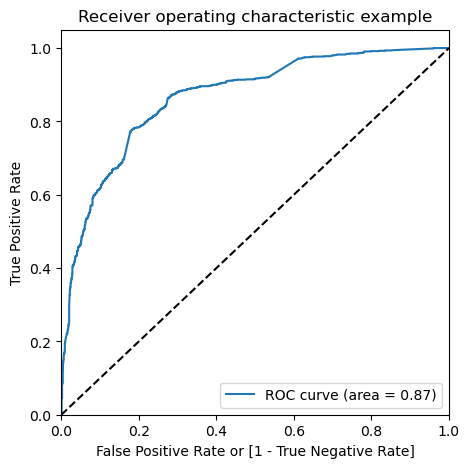

In [157]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], 
                                         drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

- Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set.
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

### Test set Model Evaluation


Calculating all metrics using confusion matrix for Test set

In [158]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1270  425]
 [ 186  891]] 

************************************************** 

True Negative                    :  1270
True Positive                    :  891
False Negative                   :  186
False Positve                    :  425
Model Accuracy                   :  0.7796
Model Sensitivity                :  0.8273
Model Specificity                :  0.7493
Model Precision                  :  0.6771
Model Recall                     :  0.8273
Model True Positive Rate (TPR)   :  0.8273
Model False Positive Rate (FPR)  :  0.2507


************************************************** 



The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

Results For Test set
- Accuracy : 78%
- Sensitivity : 82%
- Specificity :75%

In [159]:
# features and their coefficicent from final model
parameters=logm6.params.sort_values(ascending=False)
parameters

Total Time Spent on Website                3.728121
Lead Source_Reference                      2.452747
Current_occupation_Working Professional    2.382908
Last Activity_SMS Sent                     1.439265
Last Activity_Others                       0.797072
const                                     -0.747447
Specialization_Hospitality Management     -0.919980
Specialization_Others                     -0.995661
Do Not Email                              -1.233520
Last Activity_Olark Chat Conversation     -1.233647
Lead Origin_Landing Page Submission       -1.460701
dtype: float64

## Adding Lead Score Feature to Test dataframe


In [160]:
# add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4608          1        0.143999                0          14
1         7935          0        0.133267                0          13
2         4043          0        0.011728                0           1
3         7821          0        0.431611                1          43
4          856          0        0.133702                0          13

In [161]:
# Lead Score is assigned to the customers